In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import lil_matrix, csr_matrix
import time

In [13]:
def build_quarter(houses, x0, y0):
    # left down house
    houses[y0:y0 + 78, x0:x0 + 18] = 1
    houses[y0:y0 + 18, x0:x0 + 30] = 1

    # left up house
    houses[y0 + 78 + 21:y0 + 78 + 21 + 18, x0:x0 + 18] = 1

    # right down house
    houses[y0:y0 + 18, x0 + 30 + 39:x0 + 30 + 39 + 18] = 1

    # right up house
    houses[y0 + 78 + 21:y0 + 78 + 21 + 18, x0 + 18 + 39:x0 + 18 + 39 + 30] = 1
    houses[y0 + 18 + 21:y0 + 18 + 21 + 78, x0 + 30 + 39:x0 + 30 + 39 + 18] = 1

    return houses


def build_matrix_of_houses():
    houses = np.zeros((300, 300))

    # left down quarter
    houses = build_quarter(houses, 69, 12)

    # left up quarter
    houses = build_quarter(houses, 69, 12 + 78 + 21 + 18 + 36)

    # right down quarter
    houses = build_quarter(houses, 69 + 18 + 51 + 18 + 36, 12)

    # right up quarter
    houses = build_quarter(houses, 69 + 18 + 51 + 18 + 36, 12 + 78 + 21 + 18 + 36)

    return houses


def build_paramters_of_equation():
    M = 300
    l1 = 1
    l2 = 0
    f = 0
    k = 0.5
    h = 1/M
    t = h*h/(4*k)
    
    c0 = 1 - 4 * t * k / (h * h)  # coefficient for x, y
    c1 = t * (k / (h * h) - l1 / (2 * h))  # coefficient for x+1, y
    c2 = t * (k / (h * h) + l1 / (2 * h))  # coefficient for x-1, y
    c3 = t * (k / (h * h) - l2 / (2 * h))  # coefficient for x, y+1
    c4 = t * (k / (h * h) + l2 / (2 * h))  # coefficient for x, y-1
    houses = build_matrix_of_houses()

    A = lil_matrix((M * M, M * M))
    u = np.zeros((M * M, 1))

    for i in range(M):
        for j in range(M):
            n = i * M + j  # number of index in matrix A (u0_0,u0_1,...u0_299,u1_0...u299_199)

            d = np.zeros(M * M)
            indexes = []

            # u(x,y)
            d[n] = c0
            indexes.append(n)

            # u(x+1,y)
            x = i + 1
            y = j

            if x > 299 or y > 299 or y < 0 or houses[y, x] == 1:
                d[n] += c1
            else:
                indexes.append(x * M + y)
                d[x * M + y] = c1

            # u(x-1,y)
            x = i - 1
            y = j

            if x - 1 < 0:
                A[n, n] = 1
                u[n, 0] = 1
                continue
            else:
                if x > 299 or y > 299 or y < 0 or houses[y, x] == 1:
                    d[n] += c2
                else:
                    indexes.append(x * M + y)
                    d[x * M + y] += c2

            # u(x,y+1)
            x = i
            y = j + 1

            if x > 299 or y > 299 or y < 0 or houses[y, x] == 1:
                # A[n, n] += c3
                d[n] += c3
            else:
                # A[n, x * M + y] = c3
                indexes.append(x * M + y)
                d[x * M + y] += c3

            # u(x,y+1)
            x = i
            y = j - 1

            if x > 299 or y > 299 or y < 0 or houses[y, x] == 1:
                A[n, n] += c4
                d[n] += c4
            else:
                indexes.append(x * M + y)
                d[x * M + y] += c4

            for e in indexes:
                A[n, e] = d[e]

    return csr_matrix(A), u


def simple_iteration_method(A, x, e = 10e-6):
    n_iter = 100000

    e = np.float64(e)
    for i in range(n_iter):
        x_next = A * x
        if np.max(np.abs(x_next - x)) < e:
            x = x_next
            break
        x = x_next

    return x


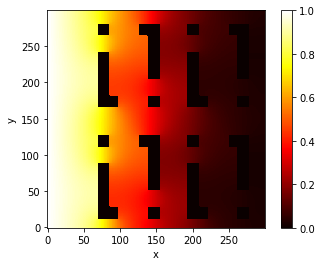

In [14]:
e = 10e-6 #change this 
start_time = time.time()
A, u = build_paramters_of_equation()
u = simple_iteration_method(A, u, e)
u = u.reshape((300, 300)).T
end_time = time.time()
plt.imshow(u, origin='lower', cmap="hot")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()



In [15]:
print("M = 300")
print("Time of execution:", end_time - start_time)
for i in range(300):
    for j in range(300):
        print(i, j, u[j,i])

M = 300
Time of execution: 22.765232801437378
0 0 1.0
0 1 1.0
0 2 1.0
0 3 1.0
0 4 1.0
0 5 1.0
0 6 1.0
0 7 1.0
0 8 1.0
0 9 1.0
0 10 1.0
0 11 1.0
0 12 1.0
0 13 1.0
0 14 1.0
0 15 1.0
0 16 1.0
0 17 1.0
0 18 1.0
0 19 1.0
0 20 1.0
0 21 1.0
0 22 1.0
0 23 1.0
0 24 1.0
0 25 1.0
0 26 1.0
0 27 1.0
0 28 1.0
0 29 1.0
0 30 1.0
0 31 1.0
0 32 1.0
0 33 1.0
0 34 1.0
0 35 1.0
0 36 1.0
0 37 1.0
0 38 1.0
0 39 1.0
0 40 1.0
0 41 1.0
0 42 1.0
0 43 1.0
0 44 1.0
0 45 1.0
0 46 1.0
0 47 1.0
0 48 1.0
0 49 1.0
0 50 1.0
0 51 1.0
0 52 1.0
0 53 1.0
0 54 1.0
0 55 1.0
0 56 1.0
0 57 1.0
0 58 1.0
0 59 1.0
0 60 1.0
0 61 1.0
0 62 1.0
0 63 1.0
0 64 1.0
0 65 1.0
0 66 1.0
0 67 1.0
0 68 1.0
0 69 1.0
0 70 1.0
0 71 1.0
0 72 1.0
0 73 1.0
0 74 1.0
0 75 1.0
0 76 1.0
0 77 1.0
0 78 1.0
0 79 1.0
0 80 1.0
0 81 1.0
0 82 1.0
0 83 1.0
0 84 1.0
0 85 1.0
0 86 1.0
0 87 1.0
0 88 1.0
0 89 1.0
0 90 1.0
0 91 1.0
0 92 1.0
0 93 1.0
0 94 1.0
0 95 1.0
0 96 1.0
0 97 1.0
0 98 1.0
0 99 1.0
0 100 1.0
0 101 1.0
0 102 1.0
0 103 1.0
0 104 1.0
0 105 1.0
0 10

2 299 0.9974730319199989
3 0 0.9965691046893264
3 1 0.9965696873358625
3 2 0.9965708495702743
3 3 0.996572585292152
3 4 0.9965748853930029
3 5 0.9965777378063592
3 6 0.9965811275738681
3 7 0.9965850369267546
3 8 0.9965894453819211
3 9 0.9965943298518121
3 10 0.9965996647670734
3 11 0.9966054222109244
3 12 0.9966115720640846
3 13 0.9966180821590256
3 14 0.9966249184422706
3 15 0.9966320451434248
3 16 0.9966394249496031
3 17 0.996647019183925
3 18 0.9966547879867557
3 19 0.9966626904984055
3 20 0.9966706850420464
3 21 0.9966787293056594
3 22 0.9966867805218986
3 23 0.9966947956448398
3 24 0.9967027315226612
3 25 0.9967105450654178
3 26 0.996718193407144
3 27 0.9967256340616535
3 28 0.9967328250714815
3 29 0.9967397251495428
3 30 0.9967462938131594
3 31 0.9967524915102343
3 32 0.9967582797374168
3 33 0.9967636211502158
3 34 0.9967684796650823
3 35 0.9967728205535655
3 36 0.9967766105287075
3 37 0.9967798178239016
3 38 0.9967824122644808
3 39 0.9967843653323505
3 40 0.9967856502239991
3 41

6 77 0.9906462869831925
6 78 0.9905826536613248
6 79 0.9905183693994465
6 80 0.9904535349828452
6 81 0.9903882520987672
6 82 0.9903226230047967
6 83 0.9902567501932366
6 84 0.9901907360538813
6 85 0.990124682537746
6 86 0.99005869082443
6 87 0.9899928609958993
6 88 0.9899272917195214
6 89 0.9898620799431922
6 90 0.9897973206053764
6 91 0.9897331063627811
6 92 0.9896695273382721
6 93 0.9896066708914546
6 94 0.9895446214141226
6 95 0.9894834601525127
6 96 0.9894232650579895
6 97 0.9893641106674487
6 98 0.9893060680143464
6 99 0.9892492045708583
6 100 0.9891935842212645
6 101 0.9891392672662079
6 102 0.9890863104570581
6 103 0.9890347670591619
6 104 0.9889846869423649
6 105 0.9889361166967683
6 106 0.9888890997713348
6 107 0.9888436766326039
6 108 0.9887998849404948
6 109 0.9887577597379229
6 110 0.9887173336507589
6 111 0.9886786370945246
6 112 0.9886416984841342
6 113 0.98860654444297
6 114 0.9885732000076262
6 115 0.9885416888247434
6 116 0.9885120333365252
6 117 0.9884842549517308
6 1

9 66 0.9859267118607875
9 67 0.9858446109410917
9 68 0.9857598594930963
9 69 0.9856725754893239
9 70 0.9855828832288376
9 71 0.9854909130299776
9 72 0.9853968008957011
9 73 0.9853006881513052
9 74 0.9852027210546295
9 75 0.9851030503791968
9 76 0.9850018309711337
9 77 0.9848992212811258
9 78 0.9847953828730873
9 79 0.984690479911659
9 80 0.9845846786310934
9 81 0.9844781467885111
9 82 0.9843710531049314
9 83 0.9842635666978695
9 84 0.9841558565096479
9 85 0.9840480907358774
9 86 0.9839404362588224
9 87 0.9838330580905558
9 88 0.9837261188309283
9 89 0.983619778145435
9 90 0.9835141922680066
9 91 0.9834095135336498
9 92 0.9833058899456353
9 93 0.9832034647816488
9 94 0.9831023762429205
9 95 0.9830027571499014
9 96 0.9829047346874926
9 97 0.9828084302022451
9 98 0.9827139590532534
9 99 0.9826214305177728
9 100 0.9825309477518135
9 101 0.9824426078052055
9 102 0.9823565016898272
9 103 0.9822727144989254
9 104 0.9821913255746773
9 105 0.982112408720445
9 106 0.9820360324534698
9 107 0.9819

12 8 0.9806452232668947
12 9 0.9806757892301698
12 10 0.980709171738544
12 11 0.980745195963874
12 12 0.9807836735466747
12 13 0.9808244036214725
12 14 0.980867173891589
12 15 0.9809117617438607
12 16 0.9809579353937163
12 17 0.9810054550510977
12 18 0.9810540740978966
12 19 0.9811035402678767
12 20 0.9811535968204663
12 21 0.9812039837003179
12 22 0.9812544386751234
12 23 0.9813046984448448
12 24 0.9813544997162397
12 25 0.9814035802373333
12 26 0.9814516797872723
12 27 0.981498541117805
12 28 0.9815439108434326
12 29 0.9815875402780545
12 30 0.9816291862166917
12 31 0.9816686116615859
12 32 0.9817055864926392
12 33 0.9817398880827686
12 34 0.9817713018593054
12 35 0.9817996218130416
12 36 0.9818246509569498
12 37 0.9818462017369378
12 38 0.9818640963972785
12 39 0.9818781673035497
12 40 0.9818882572260671
12 41 0.9818942195868521
12 42 0.9818959186731965
12 43 0.9818932298208379
12 44 0.9818860395696634
12 45 0.9818742457947145
12 46 0.9818577578150837
12 47 0.9818364964830687
12 48 

14 295 0.9658090328931562
14 296 0.9657917662053642
14 297 0.965778798188972
14 298 0.9657701442110728
14 299 0.9657658146195757
15 0 0.9749217414478986
15 1 0.9749267305184737
15 2 0.9749366821156782
15 3 0.9749515433164285
15 4 0.9749712351463631
15 5 0.9749956530672544
15 6 0.9750246676188099
15 7 0.9750581252080828
15 8 0.9750958490382302
15 9 0.9751376401669788
15 10 0.9751832786839445
15 11 0.9752325249948914
15 12 0.9752851212001515
15 13 0.9753407925537394
15 14 0.9753992489892308
15 15 0.9754601866982018
15 16 0.9755232897469628
15 17 0.9755882317174762
15 18 0.9756546773586738
15 19 0.9757222842349292
15 20 0.975790704359117
15 21 0.975859585798551
15 22 0.9759285742430474
15 23 0.9759973145254479
15 24 0.9760654520860845
15 25 0.9761326343738825
15 26 0.9761985121780379
15 27 0.976262740885453
15 28 0.9763249816603361
15 29 0.9763849025435761
15 30 0.9764421794706183
15 31 0.9764964972076481
15 32 0.9765475502068495
15 33 0.9765950433823974
15 34 0.9766386928096071
15 35 0.9

17 284 0.958053132148432
17 285 0.9579748152103763
17 286 0.9579013309137897
17 287 0.9578327471758459
17 288 0.9577691312067138
17 289 0.9577105487454313
17 290 0.9576570632955146
17 291 0.9576087353736693
17 292 0.9575656217842466
17 293 0.9575277749312554
17 294 0.9574952421787611
17 295 0.957468065269451
17 296 0.9574462798100123
17 297 0.957429914830788
17 298 0.9574189924259702
17 299 0.9574135274793413
18 0 0.9691867358958397
18 1 0.9691933332328277
18 2 0.96920649246247
18 3 0.9692261429282758
18 4 0.9692521792233371
18 5 0.9692844618764442
18 6 0.9693228182548866
18 7 0.9693670436738877
18 8 0.969416902700382
18 9 0.969472130636835
18 10 0.969532435168976
18 11 0.9695974981597898
18 12 0.9696669775708187
18 13 0.9697405094908664
18 14 0.9698177102515357
18 15 0.9698981786086897
18 16 0.9699814979689286
18 17 0.9700672386404624
18 18 0.9701549600883853
18 19 0.9702442131752453
18 20 0.9703345423689591
18 21 0.9704254879014972
18 22 0.9705165878633406
18 23 0.9706073802204238
18

20 211 0.9645972197060062
20 212 0.9645066511664724
20 213 0.9644051939456113
20 214 0.9642930218212997
20 215 0.9641703280505154
20 216 0.9640373252687726
20 217 0.9638942453539545
20 218 0.9637413392465957
20 219 0.9635788767183618
20 220 0.9634071460802888
20 221 0.9632264538222897
20 222 0.9630371241755575
20 223 0.9628394985897596
20 224 0.9626339351174069
20 225 0.9624208076984457
20 226 0.9622005053390155
20 227 0.96197343117942
20 228 0.9617400014476962
20 229 0.961500644296716
20 230 0.9612557985245093
20 231 0.9610059121794563
20 232 0.9607514410541028
20 233 0.9604928470736056
20 234 0.9602305965871482
20 235 0.9599651585730501
20 236 0.9596970027706552
20 237 0.9594265977543877
20 238 0.9591544089675146
20 239 0.9588808967351231
20 240 0.9586065142775123
20 241 0.9583317057465812
20 242 0.9580569043087823
20 243 0.9577825302987972
20 244 0.9575089894681866
20 245 0.9572366713529059
20 246 0.9569659477826924
20 247 0.9566971715539561
20 248 0.9564306752859466
20 249 0.956166

23 243 0.9506932158790673
23 244 0.9503648545920194
23 245 0.9500382944908827
23 246 0.9497139968769763
23 247 0.9493923970798172
23 248 0.9490739027983517
23 249 0.9487588927302082
23 250 0.9484477155128466
23 251 0.9481406889957352
23 252 0.9478380998574132
23 253 0.9475402035756326
23 254 0.9472472247528203
23 255 0.9469593577929833
23 256 0.94667676792005
23 257 0.9463995925215799
23 258 0.9461279427959713
23 259 0.9458619056758126
23 260 0.9456015459950389
23 261 0.9453469088631203
23 262 0.9450980222057928
23 263 0.9448548994288578
23 264 0.9446175421594941
23 265 0.944385943018295
23 266 0.9441600883750149
23 267 0.9439399610417059
23 268 0.9437255428586063
23 269 0.9435168171307377
23 270 0.9433137708766405
23 271 0.9431163968549316
23 272 0.9429246953393131
23 273 0.9427386756181579
23 274 0.942558357200705
23 275 0.9423837707180828
23 276 0.9422149585136331
23 277 0.9420519749232364
23 278 0.9418948862523059
23 279 0.9417437704617545
23 280 0.9415987165803419
23 281 0.9414598

26 253 0.9397830141056126
26 254 0.9394416314439407
26 255 0.9391067659661076
26 256 0.9387785794870909
26 257 0.9384571956206994
26 258 0.9381427022319866
26 259 0.9378351543043112
26 260 0.9375345771723189
26 261 0.9372409700651004
26 262 0.9369543098977873
26 263 0.9366745552450622
26 264 0.9364016504265619
26 265 0.9361355296321171
26 266 0.9358761210142094
26 267 0.935623350676064
26 268 0.9353771464863541
26 269 0.9351374416556159
26 270 0.9349041780150089
26 271 0.9346773089449341
26 272 0.9344568019090227
26 273 0.9342426405579485
26 274 0.9340348263771432
26 275 0.9338333798625331
26 276 0.9336383412185897
26 277 0.933449770583004
26 278 0.9332677477918935
26 279 0.9330923717083248
26 280 0.9329237591449355
26 281 0.9327620434182646
26 282 0.9326073725780331
26 283 0.9324599073588257
26 284 0.9323198189045032
26 285 0.9321872863171257
26 286 0.932062494082335
26 287 0.9319456294220916
26 288 0.931836879623574
26 289 0.9317364293900676
26 290 0.9316444582560452
26 291 0.9315611

29 256 0.9307094107747776
29 257 0.9303423745506364
29 258 0.9299839170473501
29 259 0.9296340308952906
29 260 0.9292926685390142
29 261 0.9289597475388983
29 262 0.9286351562490507
29 263 0.9283187597693386
29 264 0.9280104060634813
29 265 0.92770993213144
29 266 0.9274171701230585
29 267 0.9271319532811293
29 268 0.9268541216058972
29 269 0.9265835271393905
29 270 0.926320038776838
29 271 0.9260635465235348
29 272 0.9258139651286337
29 273 0.9255712370420491
29 274 0.9253353346565758
29 275 0.9251062618139472
29 276 0.9248840545703781
29 277 0.9246687812336517
29 278 0.9244605416994762
29 279 0.9242594661292416
29 280 0.92406571302395
29 281 0.9238794667597239
29 282 0.9237009346585634
29 283 0.9235303436738682
29 284 0.9233679367735188
29 285 0.9232139691041733
29 286 0.9230687040189601
29 287 0.9229324090472543
29 288 0.9228053518799811
29 289 0.922687796437316
29 290 0.9225799990781196
29 291 0.9224822050024012
29 292 0.922394644889908
29 293 0.9223175318099822
29 294 0.9222510584

32 241 0.9297986021157457
32 242 0.9292615192374429
32 243 0.9287277720871445
32 244 0.9281983572548377
32 245 0.9276742181257681
32 246 0.927156237908105
32 247 0.9266452332950732
32 248 0.9261419488937976
32 249 0.9256470525399227
32 250 0.9251611316008728
32 251 0.9246846903519553
32 252 0.9242181484890339
32 253 0.9237618408197367
32 254 0.9233160181527165
32 255 0.9228808493817018
32 256 0.9224564247384339
32 257 0.922042760166307
32 258 0.9216398027449597
32 259 0.92124743707543
32 260 0.9208654925161092
32 261 0.920493751141939
32 262 0.9201319562834875
32 263 0.9197798214891593
32 264 0.9194370397433094
32 265 0.91910329276593
32 266 0.9187782602162596
32 267 0.9184616286235259
32 268 0.9181530998732472
32 269 0.9178523990872048
32 270 0.9175592817492099
32 271 0.9172735399468714
32 272 0.9169950076212233
32 273 0.9167235647406803
32 274 0.9164591403425715
32 275 0.9162017144135949
32 276 0.9159513186089856
32 277 0.9157080358380508
32 278 0.9154719987700349
32 279 0.9152433873

35 226 0.9314057456929343
35 227 0.9308746460441706
35 228 0.930328173932974
35 229 0.9297674450011986
35 230 0.9291936331286751
35 231 0.9286079677689274
35 232 0.9280117303371521
35 233 0.9274062495923339
35 234 0.9267928959750084
35 235 0.9261730748862504
35 236 0.9255482189216009
35 237 0.9249197791050527
35 238 0.9242892152018667
35 239 0.9236579852234353
35 240 0.9230275342711243
35 241 0.9223992828971732
35 242 0.9217746151876911
35 243 0.9211548667939015
35 244 0.9205413131518845
35 245 0.9199351581372577
35 246 0.9193375233992553
35 247 0.9187494386086734
35 248 0.918171832836911
35 249 0.9176055272598584
35 250 0.9170512293520888
35 251 0.9165095287050542
35 252 0.9159808945691774
35 253 0.9154656751850164
35 254 0.9149640989339367
35 255 0.9144762773045573
35 256 0.9140022096379089
35 257 0.913541789581874
35 258 0.913094813154014
35 259 0.9126609882813649
35 260 0.912239945656277
35 261 0.9118312507192471
35 262 0.9114344165534835
35 263 0.9110489174525106
35 264 0.91067420

38 195 0.9315270503343439
38 196 0.9317702304373102
38 197 0.9319838360976883
38 198 0.932167654576564
38 199 0.9323215088107599
38 200 0.9324452555321037
38 201 0.9325387836991061
38 202 0.9326020132444347
38 203 0.9326348941402416
38 204 0.9326374057824428
38 205 0.9326095566944221
38 206 0.9325513845501627
38 207 0.9324629565164497
38 208 0.9323443699133815
38 209 0.932195753191904
38 210 0.9320172672262961
38 211 0.9318091069184354
38 212 0.9315715031090388
38 213 0.9313047247889162
38 214 0.9310090816003259
38 215 0.9306849266147781
38 216 0.9303326593688507
38 217 0.9299527291337404
38 218 0.929545638387161
38 219 0.9291119464478157
38 220 0.9286522732228807
38 221 0.9281673030078217
38 222 0.9276577882654016
38 223 0.9271245532972108
38 224 0.926568497706621
38 225 0.9259905995372958
38 226 0.9253919179567835
38 227 0.9247735953411365
38 228 0.9241368586048766
38 229 0.9234830196121633
38 230 0.9228134745009703
38 231 0.9221297017538832
38 232 0.9214332588581124
38 233 0.9207257

41 171 0.9111789512927753
41 172 0.9120535279728261
41 173 0.9129203258843415
41 174 0.913777034778119
41 175 0.9146214472362482
41 176 0.9154514682048495
41 177 0.9162651219187452
41 178 0.9170605563527578
41 179 0.9178360454016647
41 180 0.918589989037503
41 181 0.9193209117201435
41 182 0.9200274593473298
41 183 0.9207083950267334
41 184 0.921362593938359
41 185 0.9219890375339648
41 186 0.9225868072939387
41 187 0.9231550782336008
41 188 0.923693112322144
41 189 0.9242002519496907
41 190 0.9246759135522478
41 191 0.9251195814812402
41 192 0.9255308021841022
41 193 0.9259091787451714
41 194 0.9262543658217861
41 195 0.9265660649988271
41 196 0.9268440205757474
41 197 0.927088015793062
41 198 0.9272978695001173
41 199 0.9274734332623481
41 200 0.9276145889039864
41 201 0.9277212464810081
41 202 0.9277933426788133
41 203 0.9278308396295246
41 204 0.9278337241446979
41 205 0.9278020073605078
41 206 0.9277357247939823
41 207 0.9276349368104547
41 208 0.9274997295039897
41 209 0.92733021

44 144 0.8828727260061511
44 145 0.8831976319853124
44 146 0.8835638799744673
44 147 0.8839718810060618
44 148 0.8844218842829165
44 149 0.8849139725064591
44 150 0.8854480558143344
44 151 0.8860238644020727
44 152 0.886640940033702
44 153 0.8872986267782499
44 154 0.8879960614400247
44 155 0.8887321642750821
44 156 0.8895056306963649
44 157 0.8903149247550621
44 158 0.8911582752330236
44 159 0.8920336751772372
44 160 0.8929388856402748
44 161 0.8938714442521635
44 162 0.8948286790380195
44 163 0.8958077276199672
44 164 0.8968055616197711
44 165 0.8978190157383588
44 166 0.8988448206647499
44 167 0.8998796386961156
44 168 0.9009201007642361
44 169 0.9019628434825515
44 170 0.9030045448589518
44 171 0.9040419574539889
44 172 0.9050719379810594
44 173 0.9060914726148993
44 174 0.9070976975653957
44 175 0.9080879147558262
44 176 0.9090596026948501
44 177 0.9100104228347624
44 178 0.9109382218575792
44 179 0.9118410304254623
44 180 0.9127170589779049
44 181 0.913564691163273
44 182 0.91438

47 98 0.8836735282857868
47 99 0.8828717212083818
47 100 0.8821207513239604
47 101 0.881420378941
47 102 0.8807698104068863
47 103 0.8801677190578601
47 104 0.8796122730288077
47 105 0.879101170186533
47 106 0.8786316807042702
47 107 0.8782006978669089
47 108 0.877804797546845
47 109 0.87744030641389
47 110 0.8771033783723974
47 111 0.8767900780264388
47 112 0.8764964692606998
47 113 0.8762187064028826
47 114 0.8759531250015459
47 115 0.8756963290737434
47 116 0.875445271761993
47 117 0.8751973266535568
47 118 0.8749503474864374
47 119 0.8747027145140586
47 120 0.8744533663534944
47 121 0.8742018166556339
47 122 0.873948155396909
47 123 0.8736930350154218
47 124 0.8734376420295343
47 125 0.8731836552145341
47 126 0.8729331918883424
47 127 0.8726887443594848
47 128 0.8724531090782774
47 129 0.8722293114385056
47 130 0.8720205294243102
47 131 0.8718300193185098
47 132 0.8716610464488582
47 133 0.8715168234579602
47 134 0.8714004578969001
47 135 0.8713149101514067
47 136 0.871262961913282

50 195 0.9135070340684193
50 196 0.9139018024355697
50 197 0.9142473982254913
50 198 0.914543921268077
50 199 0.9147914657994827
50 200 0.9149901172798565
50 201 0.9151399498751711
50 202 0.9152410245390452
50 203 0.9152933876449743
50 204 0.9152970701331169
50 205 0.9152520871488782
50 206 0.9151584381632343
50 207 0.9150161075772574
50 208 0.9148250658258752
50 209 0.9145852710087585
50 210 0.9142966710896014
50 211 0.9139592067191694
50 212 0.9135728147525027
50 213 0.9131374325467757
50 214 0.9126530031435731
50 215 0.9121194814577848
50 216 0.9115368416148082
50 217 0.9109050855979199
50 218 0.9102242533879551
50 219 0.9094944347967832
50 220 0.9087157832129247
50 221 0.9078885314898049
50 222 0.9070130102112968
50 223 0.9060896685610804
50 224 0.9051190979960568
50 225 0.904102058872203
50 226 0.9030395100845983
50 227 0.9019326416510568
50 228 0.9007829099788544
50 229 0.8995920752944724
50 230 0.8983622403771477
50 231 0.8970958893137855
50 232 0.8957959244910194
50 233 0.89446

53 132 0.8502728417269076
53 133 0.8499051341872205
53 134 0.8495776799071416
53 135 0.8492960782119483
53 136 0.8490651791801946
53 137 0.8488891189166534
53 138 0.8487713835403292
53 139 0.8487148899463276
53 140 0.848722073372288
53 141 0.8487949742273939
53 142 0.8489353189793637
53 143 0.8491445918431115
53 144 0.8494240954653863
53 145 0.8497749997645468
53 146 0.8501983786360784
53 147 0.8506952344654306
53 148 0.8512665103915253
53 149 0.8519130901184933
53 150 0.8526357848519824
53 151 0.8534353067082379
53 152 0.8543122277814401
53 153 0.8552669240421024
53 154 0.8562995034793295
53 155 0.8574097185138982
53 156 0.8585968638280449
53 157 0.8598596624945122
53 158 0.8611961456869552
53 159 0.8626035342164813
53 160 0.8640781333261619
53 161 0.8656152549292736
53 162 0.8672091828197228
53 163 0.8688531951783733
53 164 0.8705396540461894
53 165 0.8722601632502593
53 166 0.8740057858020386
53 167 0.8757673016317533
53 168 0.8775354797638232
53 169 0.8793013377809281
53 170 0.8810

56 168 0.8696193059912745
56 169 0.8717631856460734
56 170 0.873884283252549
56 171 0.8759714769928335
56 172 0.8780153383451389
56 173 0.8800081207694603
56 174 0.8819436518110261
56 175 0.8838171679891977
56 176 0.8856251240901135
56 177 0.8873649993121212
56 178 0.8890351144189654
56 179 0.8906344675761076
56 180 0.8921625919919443
56 181 0.8936194355744768
56 182 0.8950052611404197
56 183 0.8963205648934826
56 184 0.8975660106127599
56 185 0.8987423770364128
56 186 0.8998505161385731
56 187 0.9008913202827102
56 188 0.9018656965356464
56 189 0.9027745467119951
56 190 0.9036187519741885
56 191 0.9043991610333517
56 192 0.9051165811812695
56 193 0.9057717715365465
56 194 0.9063654380128147
56 195 0.9068982296178094
56 196 0.9073707357733687
56 197 0.9077834844115193
56 198 0.9081369406539233
56 199 0.9084315059236479
56 200 0.9086675173716898
56 201 0.9088452475276698
56 202 0.9089649041060937
56 203 0.9090266299177457
56 204 0.9090305028511368
56 205 0.908976535902313
56 206 0.90886

59 167 0.8590660886611441
59 168 0.8617421156002607
59 169 0.8643874646514143
59 170 0.8669825521347423
59 171 0.8695120027943511
59 172 0.8719643864174997
59 173 0.8743316867872772
59 174 0.8766086794350005
59 175 0.8787923272086743
59 176 0.8808812484147138
59 177 0.8828752765372564
59 178 0.8847751103922361
59 179 0.8865820440978203
59 180 0.8882977631159836
59 181 0.8899241928145403
59 182 0.8914633876583485
59 183 0.8929174512386882
59 184 0.8942884793873697
59 185 0.8955785203889178
59 186 0.8967895477459802
59 187 0.8979234420873524
59 188 0.8989819796796367
59 189 0.8999668256630908
59 190 0.9008795306261816
59 191 0.9017215295007618
59 192 0.9024941420317986
59 193 0.9031985742763502
59 194 0.9038359207343247
59 195 0.9044071668222619
59 196 0.9049131914811559
59 197 0.905354769767795
59 198 0.9057325753218439
59 199 0.9060471826320525
59 200 0.9062990690476309
59 201 0.9064886164972223
59 202 0.9066161128897489
59 203 0.9066817531799435
59 204 0.9066856400876057
59 205 0.9066

62 191 0.8997001305504587
62 192 0.9005176650029901
62 193 0.9012620089108869
62 194 0.9019346288529069
62 195 0.9025368282905706
62 196 0.9030697568435804
62 197 0.9035344183763603
62 198 0.9039316779734631
62 199 0.904262267875892
62 200 0.904526792442669
62 201 0.9047257321931532
62 202 0.9048594469762765
62 203 0.9049281783033163
62 204 0.9049320508712647
62 205 0.9048710732943309
62 206 0.904745138051649
62 207 0.904554020649824
62 208 0.9042973779894873
62 209 0.9039747459155091
62 210 0.9035855359209126
62 211 0.9031290309648389
62 212 0.9026043803552561
62 213 0.902010593637619
62 214 0.9013465334217907
62 215 0.9006109070717927
62 216 0.8998022571774282
62 217 0.8989189507250884
62 218 0.8979591668896887
62 219 0.8969208833846181
62 220 0.8958018613379446
62 221 0.8945996287203262
62 222 0.8933114624477048
62 223 0.8919343694423514
62 224 0.8904650671939442
62 225 0.8888999647718978
62 226 0.8872351458845728
62 227 0.8854663565897344
62 228 0.8835890018341412
62 229 0.88159815

65 215 0.8993385709143231
65 216 0.8984989894358052
65 217 0.897580834326895
65 218 0.8965818719260015
65 219 0.895499591422807
65 220 0.8943311742967959
65 221 0.8930734582972095
65 222 0.8917228948927696
65 223 0.8902754988695558
65 224 0.8887267884470935
65 225 0.8870717139063595
65 226 0.8853045722733538
65 227 0.8834189050843992
65 228 0.8814073757101588
65 229 0.8792616222372666
65 230 0.8769720817493034
65 231 0.8745277825805978
65 232 0.8719161039900594
65 233 0.8691225104485173
65 234 0.8661302862773499
65 235 0.8629203385511697
65 236 0.8594712296121294
65 237 0.8557598036744356
65 238 0.8517632030028774
65 239 0.8474639422580889
65 240 0.8428613048242783
65 241 0.837994516122395
65 242 0.8329830727033385
65 243 0.828073640407009
65 244 0.8236117595041506
65 245 0.8197287049084464
65 246 0.8164117614562783
65 247 0.813596633942033
65 248 0.8112135469230375
65 249 0.8092029588398346
65 250 0.8075183919991562
65 251 0.8061251251116834
65 252 0.8049981308688532
65 253 0.80412032

68 170 0.8531037527182206
68 171 0.8571911543814096
68 172 0.8609200108473941
68 173 0.8643455610292851
68 174 0.8675089736396667
68 175 0.8704419523487367
68 176 0.8731695546802629
68 177 0.875712005957924
68 178 0.8780859155277616
68 179 0.8803051205908243
68 180 0.8823812887951858
68 181 0.8843243592676177
68 182 0.886142872308928
68 183 0.8878442204329033
68 184 0.8894348426109617
68 185 0.8909203767084162
68 186 0.8923057806086601
68 187 0.8935954295194171
68 188 0.89479319490434
68 189 0.8959025090549643
68 190 0.8969264183058219
68 191 0.8978676271666353
68 192 0.8987285351128842
68 193 0.8995112673814867
68 194 0.9002177008223194
68 195 0.900849485631475
68 196 0.9014080636194142
68 197 0.9018946835328618
68 198 0.9023104138436499
68 199 0.9026561533335511
68 200 0.9029326397361918
68 201 0.9031404566414021
68 202 0.9032800388208369
68 203 0.9033516760940138
68 204 0.903355515819216
68 205 0.903291564062428
68 206 0.9031596854683355
68 207 0.9029596018292263
68 208 0.9026908893

71 96 0.7653177314135126
71 97 0.7644049089751375
71 98 0.763643331119008
71 99 0.763035310727367
71 100 0.7625807101439829
71 101 0.7622785214708648
71 102 0.7621275700444554
71 103 0.7621265752993249
71 104 0.7622735322173471
71 105 0.7625640782546219
71 106 0.7629880509898825
71 107 0.763522691252819
71 108 0.7641200403610542
71 109 0.7646867386140707
71 110 0.7650646777878756
71 111 0.7650462370608235
71 112 0.0
71 113 0.0
71 114 0.0
71 115 0.0
71 116 0.0
71 117 0.0
71 118 0.0
71 119 0.0
71 120 0.0
71 121 0.0
71 122 0.0
71 123 0.0
71 124 0.0
71 125 0.0
71 126 0.0
71 127 0.0
71 128 0.7641309902077834
71 129 0.7641492417583329
71 130 0.7637129929176762
71 131 0.7630326738405475
71 132 0.7622700541328324
71 133 0.7615212810739863
71 134 0.7608356646143248
71 135 0.7602358220956587
71 136 0.7597304154302423
71 137 0.7593211409355537
71 138 0.7590063913157067
71 139 0.7587831544829978
71 140 0.7586480000875022
71 141 0.7585975920906761
71 142 0.7586289512384542
71 143 0.758739583170872


74 95 0.740624528818695
74 96 0.7401957703848278
74 97 0.7398114504880486
74 98 0.7394850719315939
74 99 0.7392246563873064
74 100 0.7390342888120731
74 101 0.7389151812178827
74 102 0.7388662430015374
74 103 0.7388841794811297
74 104 0.7389631409230603
74 105 0.739093955484037
74 106 0.7392630484498917
74 107 0.7394513426426594
74 108 0.7396338256042545
74 109 0.7397810472166743
74 110 0.7398641831021593
74 111 0.7398439744040805
74 112 0.0
74 113 0.0
74 114 0.0
74 115 0.0
74 116 0.0
74 117 0.0
74 118 0.0
74 119 0.0
74 120 0.0
74 121 0.0
74 122 0.0
74 123 0.0
74 124 0.0
74 125 0.0
74 126 0.0
74 127 0.0
74 128 0.7413858373792033
74 129 0.7414056176401114
74 130 0.741307499002877
74 131 0.7411305132936503
74 132 0.7409037317136917
74 133 0.7406566960543436
74 134 0.7404142047829861
74 135 0.7401947535607177
74 136 0.7400109982930937
74 137 0.7398709727093289
74 138 0.7397793792647136
74 139 0.739738678956106
74 140 0.7397499168443129
74 141 0.739813307802299
74 142 0.739928632582877
74 

77 122 0.0
77 123 0.0
77 124 0.0
77 125 0.0
77 126 0.0
77 127 0.0
77 128 0.7193791423865514
77 129 0.7194003891767542
77 130 0.7194055244481224
77 131 0.719417138735728
77 132 0.7194375060403462
77 133 0.7194692638277408
77 134 0.7195149443978436
77 135 0.7195767088556806
77 136 0.7196562663342182
77 137 0.7197549119021366
77 138 0.7198736181233888
77 139 0.7200131359680657
77 140 0.720174081734953
77 141 0.7203570011751546
77 142 0.7205624099484274
77 143 0.7207908128506227
77 144 0.7210427048957222
77 145 0.7213185566954481
77 146 0.7216187854418894
77 147 0.7219437115480118
77 148 0.7222934997921527
77 149 0.7226680826956426
77 150 0.7230670628642124
77 151 0.7234895902064306
77 152 0.7239342094620346
77 153 0.7243986736530003
77 154 0.7248797205062338
77 155 0.7253728125983113
77 156 0.7258718495182225
77 157 0.7263688739552163
77 158 0.7268538158994995
77 159 0.7273143519445984
77 160 0.7277359981753695
77 161 0.7281025940897297
77 162 0.7283973426564878
77 163 0.7286044967239249


80 89 0.6856448759257474
80 90 0.685668838966873
80 91 0.6858256851397546
80 92 0.6861193375667216
80 93 0.6865170311309442
80 94 0.6869821092836847
80 95 0.6874804045940183
80 96 0.6879833855550224
80 97 0.6884689050432229
80 98 0.6889206501661569
80 99 0.6893271119534986
80 100 0.6896805478098381
80 101 0.6899761619354842
80 102 0.6902115887752198
80 103 0.6903866963464171
80 104 0.6905036908531298
80 105 0.6905674671114971
80 106 0.6905860797526904
80 107 0.6905710813448409
80 108 0.6905372837764167
80 109 0.6905013294033999
80 110 0.6904785672531963
80 111 0.6904549497132315
80 112 0.0
80 113 0.0
80 114 0.0
80 115 0.0
80 116 0.0
80 117 0.0
80 118 0.0
80 119 0.0
80 120 0.0
80 121 0.0
80 122 0.0
80 123 0.0
80 124 0.0
80 125 0.0
80 126 0.0
80 127 0.0
80 128 0.6970828894737404
80 129 0.6971056106415506
80 130 0.6972010939463675
80 131 0.6973807409849759
80 132 0.6976263017237536
80 133 0.6979178317802764
80 134 0.698237386077104
80 135 0.6985707399152541
80 136 0.6989076758794261
80 13

82 272 0.0
82 273 0.0
82 274 0.0
82 275 0.0
82 276 0.0
82 277 0.0
82 278 0.0
82 279 0.0
82 280 0.0
82 281 0.6863047152026127
82 282 0.6863294445087617
82 283 0.6865148200817937
82 284 0.6868468189894502
82 285 0.6872729258744442
82 286 0.6877453890610973
82 287 0.6882281107191939
82 288 0.6886966928599433
82 289 0.6891360086993665
82 290 0.6895374939142199
82 291 0.6898969215870135
82 292 0.6902127811216944
82 293 0.6904851652582314
82 294 0.6907150306148411
82 295 0.6909037162702729
82 296 0.6910526349790584
82 297 0.6911630778868643
82 298 0.6912360932238958
82 299 0.691272413245591
83 0 0.6789971742734159
83 1 0.6789995062191186
83 2 0.6790040374893327
83 3 0.6790105057142927
83 4 0.6790185255254855
83 5 0.6790276010105133
83 6 0.6790371461265585
83 7 0.6790465150971117
83 8 0.6790550436862615
83 9 0.6790621001057575
83 10 0.6790671413857041
83 11 0.6790697680488641
83 12 0.6790472624233326
83 13 0.0
83 14 0.0
83 15 0.0
83 16 0.0
83 17 0.0
83 18 0.0
83 19 0.0
83 20 0.0
83 21 0.0
83 

85 281 0.6633636824535735
85 282 0.6633899629447244
85 283 0.6642570913439886
85 284 0.6654422473701918
85 285 0.6666648163568518
85 286 0.6678152449454844
85 287 0.6688578641311437
85 288 0.6697858291476073
85 289 0.6706029333299491
85 290 0.6713164883347613
85 291 0.6719345347180989
85 292 0.6724647503958426
85 293 0.6729140379605978
85 294 0.6732883884433001
85 295 0.673592857613093
85 296 0.6738315858287868
85 297 0.6740078315241129
85 298 0.6741240050290913
85 299 0.6741816967131613
86 0 0.6519482442560662
86 1 0.6519327186489303
86 2 0.651902537569838
86 3 0.6518594246888708
86 4 0.6518059174743458
86 5 0.6517452921253742
86 6 0.6516814374092386
86 7 0.6516186618848389
86 8 0.6515614251288886
86 9 0.6515139972458616
86 10 0.6514800718056573
86 11 0.6514623811985466
86 12 0.6514381622534573
86 13 0.0
86 14 0.0
86 15 0.0
86 16 0.0
86 17 0.0
86 18 0.0
86 19 0.0
86 20 0.0
86 21 0.0
86 22 0.0
86 23 0.0
86 24 0.0
86 25 0.0
86 26 0.0
86 27 0.0
86 28 0.0
86 29 0.0
86 30 0.426351723013477

88 267 0.6144513161206138
88 268 0.6125616775473831
88 269 0.6112240118885576
88 270 0.6103754339415225
88 271 0.6099743699977133
88 272 0.6099956972430536
88 273 0.6104276756002901
88 274 0.6112704751221263
88 275 0.6125360877549489
88 276 0.6142496131836397
88 277 0.6164521073084055
88 278 0.6192051613837113
88 279 0.6225961652852636
88 280 0.6267362692403777
88 281 0.6317098043625228
88 282 0.6372803247661715
88 283 0.6414485113516672
88 284 0.6445391073601354
88 285 0.6469279179360894
88 286 0.6488458719982984
88 287 0.6504269549278184
88 288 0.651752114099531
88 289 0.6528733581049119
88 290 0.6538261088700911
88 291 0.6546356713072957
88 292 0.6553207877861144
88 293 0.6558956946882061
88 294 0.6563713696640221
88 295 0.6567563184118757
88 296 0.6570570861980307
88 297 0.6572785968682306
88 298 0.6574243784201868
88 299 0.6574967098750207
89 0 0.6247191435123292
89 1 0.6246774051064192
89 2 0.6245959313397251
89 3 0.6244787562421201
89 4 0.6243319806678913
89 5 0.6241637740518781

91 192 0.45141799844405117
91 193 0.45175605214692605
91 194 0.4521543822110107
91 195 0.45261599260669544
91 196 0.45314347680143724
91 197 0.45373907706749167
91 198 0.4544047376951661
91 199 0.4551421519279587
91 200 0.45595280313644404
91 201 0.45683800100241945
91 202 0.45779891352240026
91 203 0.45883659558280326
91 204 0.4599520147702282
91 205 0.46114607498856863
91 206 0.4624196383727187
91 207 0.46377354592066944
91 208 0.46520863721230643
91 209 0.46672576954330475
91 210 0.46832583677482353
91 211 0.4700097881830211
91 212 0.4717786475857587
91 213 0.4736335330266582
91 214 0.4755756773085926
91 215 0.4776064496897852
91 216 0.479727379086218
91 217 0.48194017916451265
91 218 0.4842467757604536
91 219 0.48664933712039005
91 220 0.4891503075360656
91 221 0.49175244502716464
91 222 0.49445886381724335
91 223 0.49727308244103274
91 224 0.5001990784003612
91 225 0.5032413503246851
91 226 0.5064049885383857
91 227 0.5096957546936742
91 228 0.5131201705162303
91 229 0.51668561440

94 91 0.5644119571417495
94 92 0.5684799597820929
94 93 0.5722451295417574
94 94 0.5756886353631544
94 95 0.5788050054658476
94 96 0.5815977250093348
94 97 0.5840753891863544
94 98 0.5862488683724395
94 99 0.5881294508572892
94 100 0.5897277571680595
94 101 0.5910532154317121
94 102 0.5921139471521002
94 103 0.5929169878030485
94 104 0.5934688385718598
94 105 0.5937764074273459
94 106 0.5938484380365961
94 107 0.593697513642852
94 108 0.5933425980255065
94 109 0.5928117494170907
94 110 0.5921440755750023
94 111 0.5913894128984852
94 112 0.5906044056083422
94 113 0.589845726255043
94 114 0.58916411713086
94 115 0.5886012333721652
94 116 0.5881890919393532
94 117 0.5879510644435573
94 118 0.5879034233422754
94 119 0.5880568110488616
94 120 0.5884173162727353
94 121 0.5889870310587804
94 122 0.5897640511489324
94 123 0.590741921871275
94 124 0.5919085723829665
94 125 0.5932448735024365
94 126 0.5947231490663498
94 127 0.5963062920858766
94 128 0.5979484991527678
94 129 0.5995986927096795


97 105 0.5798486502529041
97 106 0.5802718576895184
97 107 0.5805343765446677
97 108 0.5806542365210435
97 109 0.5806529409123633
97 110 0.5805553788565402
97 111 0.5803892004904778
97 112 0.5801836463015306
97 113 0.5799680250833322
97 114 0.5797701809394658
97 115 0.5796152521099885
97 116 0.5795248642585267
97 117 0.5795167402943612
97 118 0.5796046141742709
97 119 0.5797983103460561
97 120 0.5801038687044068
97 121 0.5805236323851731
97 122 0.5810562579403491
97 123 0.5816966495038868
97 124 0.5824358606395343
97 125 0.5832610497008335
97 126 0.5841556114590081
97 127 0.5850996243877703
97 128 0.5860707239475023
97 129 0.5870454125017472
97 130 0.5880006504235377
97 131 0.5889154104584691
97 132 0.5897718446658317
97 133 0.5905558706333022
97 134 0.5912571956010261
97 135 0.5918689340306847
97 136 0.5923870080983487
97 137 0.5928094875177156
97 138 0.5931359693414162
97 139 0.593367047681275
97 140 0.5935038878550596
97 141 0.5935478991702381
97 142 0.593500491363484
97 143 0.59336

100 89 0.5351807601541306
100 90 0.5383525591908815
100 91 0.5414142749149655
100 92 0.5443492512258368
100 93 0.5471428806698166
100 94 0.549782976976781
100 95 0.5522599395900466
100 96 0.55456673489922
100 97 0.5566987444724483
100 98 0.5586535388274376
100 99 0.5604306303991694
100 100 0.5620312474566718
100 101 0.563458156787848
100 102 0.5647155498577358
100 103 0.5658089957649135
100 104 0.5667454543681628
100 105 0.5675333336876351
100 106 0.568182566621408
100 107 0.568704673549548
100 108 0.56911277123106
100 109 0.569421487595946
100 110 0.5696467501962105
100 111 0.5698054353253832
100 112 0.5699148929725715
100 113 0.5699923917269047
100 114 0.5700545459022153
100 115 0.5701167866259226
100 116 0.5701929213356397
100 117 0.5702948012628015
100 118 0.570432093863485
100 119 0.5706121426989887
100 120 0.5708398923764004
100 121 0.5711178592889793
100 122 0.5714461373495769
100 123 0.5718224388989592
100 124 0.5722421818809988
100 125 0.5726986425800835
100 126 0.573183195892

103 94 0.5394248989818178
103 95 0.541660155161644
103 96 0.5437639210509775
103 97 0.545731911046657
103 98 0.5475613029267462
103 99 0.5492506824814732
103 100 0.550799975575307
103 101 0.5522103794303187
103 102 0.5534843008853841
103 103 0.5546253049254108
103 104 0.5556380723647187
103 105 0.5565283615643948
103 106 0.5573029658037761
103 107 0.5579696558111706
103 108 0.5585370964543236
103 109 0.5590147281258324
103 110 0.5594126071134322
103 111 0.5597412048961031
103 112 0.5600111728692152
103 113 0.5602330849522942
103 114 0.5604171742944343
103 115 0.5605730809024159
103 116 0.5607096245694301
103 117 0.5608346130296531
103 118 0.5609546902854952
103 119 0.5610752258676435
103 120 0.56120024318308
103 121 0.5613323842651392
103 122 0.5614729088468111
103 123 0.5616217270978384
103 124 0.5617774668105875
103 125 0.5619375764979793
103 126 0.5620984651325491
103 127 0.5622556767808979
103 128 0.5624040943451929
103 129 0.5625381617992983
103 130 0.5626521100174675
103 131 0.56

106 13 0.46332195962924905
106 14 0.460038058174568
106 15 0.45678135120303265
106 16 0.45360036272133897
106 17 0.45053121164280907
106 18 0.44759886382137415
106 19 0.44481930809993003
106 20 0.44220182423530136
106 21 0.4397509521141956
106 22 0.43746804736739303
106 23 0.4353524438523353
106 24 0.4334022924960207
106 25 0.4316151505437701
106 26 0.4299883794584531
106 27 0.42851938505217063
106 28 0.42720570609811803
106 29 0.426044937015284
106 30 0.4250344777675472
106 31 0.42417117258342163
106 32 0.4234510278011886
106 33 0.4228692422310019
106 34 0.4224204955629711
106 35 0.4220993136059952
106 36 0.4219003751976514
106 37 0.4218187105064837
106 38 0.4218497966630479
106 39 0.42198957841784906
106 40 0.42223444282632483
106 41 0.42258117040327947
106 42 0.42302687758446883
106 43 0.4235689592371532
106 44 0.42420503580270197
106 45 0.4249329070855236
106 46 0.425750513233233
106 47 0.426655902673299
106 48 0.42764720639550646
106 49 0.4287226178163391
106 50 0.429880377423522


108 257 0.5539153382688732
108 258 0.5548773674176345
108 259 0.5557541655903003
108 260 0.5565485993316944
108 261 0.5572638608221767
108 262 0.5579034089943672
108 263 0.5584709111898561
108 264 0.5589701866872535
108 265 0.5594051534142321
108 266 0.5597797790813644
108 267 0.5600980378823042
108 268 0.5603638738124086
108 269 0.5605811715417515
108 270 0.560753735575974
108 271 0.560885278078871
108 272 0.5609794151709152
108 273 0.5610396707652058
108 274 0.5610694861211509
108 275 0.5610722324042383
108 276 0.5610512227992661
108 277 0.5610097203246183
108 278 0.5609509376279811
108 279 0.560878025855043
108 280 0.5607940512065779
108 281 0.5607019598913008
108 282 0.5606045344845895
108 283 0.5605043466911986
108 284 0.5604037126356523
108 285 0.5603046567075524
108 286 0.5602088886708989
108 287 0.5601177965851185
108 288 0.5600324556769324
108 289 0.5599536512204482
108 290 0.5598819120964186
108 291 0.5598175511149809
108 292 0.5597607082904305
108 293 0.5597113938291673
108 

111 273 0.5526051270678874
111 274 0.552445169445306
111 275 0.5522340457557917
111 276 0.55197650050853
111 277 0.5516779254142962
111 278 0.5513443342881772
111 279 0.5509822866850449
111 280 0.5505987532225134
111 281 0.5502009241864836
111 282 0.5497959743767014
111 283 0.5493908083357854
111 284 0.5489918170999545
111 285 0.5486046771351443
111 286 0.5482342138238369
111 287 0.5478843388791459
111 288 0.547558058026587
111 289 0.5472575358200685
111 290 0.5469841999191751
111 291 0.5467388669890139
111 292 0.5465218750730159
111 293 0.5463332112356665
111 294 0.546172627277087
111 295 0.5460397396983011
111 296 0.5459341125820466
111 297 0.5458553236571719
111 298 0.5458030146770623
111 299 0.5457769275463502
112 0 0.4553269857085825
112 1 0.4551601791012583
112 2 0.45482737390299305
112 3 0.4543302625318946
112 4 0.4536715698438266
112 5 0.4528552621484207
112 6 0.4518867984981719
112 7 0.4507733952215634
112 8 0.4495242631414854
112 9 0.44815076707446294
112 10 0.446666453862638

114 259 0.5410766886003157
114 260 0.5418742201787695
114 261 0.5425980549150468
114 262 0.5432466367843141
114 263 0.5438179945870886
114 264 0.5443098037966219
114 265 0.5447195178752603
114 266 0.5450445505940156
114 267 0.5452824777983922
114 268 0.5454312288729742
114 269 0.5454892517880745
114 270 0.5454556517059629
114 271 0.5453303145506742
114 272 0.5451140313438045
114 273 0.5448086372227636
114 274 0.5444171724540223
114 275 0.5439440625713754
114 276 0.5433953016082508
114 277 0.5427786069939883
114 278 0.5421034990923651
114 279 0.5413812472263198
114 280 0.5406246252559465
114 281 0.5398474429200988
114 282 0.5390638696464831
114 283 0.5382876367394763
114 284 0.5375312618635992
114 285 0.5368054464523909
114 286 0.536118738780846
114 287 0.5354774718578394
114 288 0.5348859211382768
114 289 0.5343466002530748
114 290 0.533860616982172
114 291 0.53342803140176
114 292 0.5330481808381008
114 293 0.5327199550815678
114 294 0.5324420181473715
114 295 0.5322129802322972
114 2

117 206 0.4430749509123796
117 207 0.4444894804622943
117 208 0.44597130092917203
117 209 0.44751611120096857
117 210 0.44911969064564716
117 211 0.45077793589937687
117 212 0.45248688826788397
117 213 0.45424275159604816
117 214 0.45604190107517206
117 215 0.45788088391233644
117 216 0.4597564130709165
117 217 0.46166535542112286
117 218 0.463604715645153
117 219 0.46557161715952716
117 220 0.46756328118221335
117 221 0.46957700491327387
117 222 0.47161013963671256
117 223 0.4736600694024048
117 224 0.47572419081856687
117 225 0.4777998943804269
117 226 0.47988454767926947
117 227 0.4819754807752491
117 228 0.4840699739732597
117 229 0.4861652482090234
117 230 0.4882584582274858
117 231 0.490346688712813
117 232 0.4924269535044015
117 233 0.49449619800261935
117 234 0.49655130482858995
117 235 0.4985891027523792
117 236 0.5006063788428201
117 237 0.5025998937206333
117 238 0.5045663997165991
117 239 0.5065026616516873
117 240 0.5084054798706938
117 241 0.5102717150799742
117 242 0.512

120 245 0.5127179659989027
120 246 0.5142732728787647
120 247 0.5157791302130474
120 248 0.5172339773106576
120 249 0.5186364868499144
120 250 0.5199855908528241
120 251 0.5212805082091889
120 252 0.5225207740297569
120 253 0.5237062706468857
120 254 0.5248372588573444
120 255 0.5259144052152989
120 256 0.5269387953175118
120 257 0.5279119113598792
120 258 0.5288355304022269
120 259 0.5297114621914745
120 260 0.5305409898461998
120 261 0.5313238208804612
120 262 0.532056380150058
120 263 0.5327295933237963
120 264 0.5333272481337514
120 265 0.5338274018322386
120 266 0.5342083392422289
120 267 0.5344521562601654
120 268 0.5345453188194312
120 269 0.5344777357446152
120 270 0.5342415313452484
120 271 0.5338300395389177
120 272 0.5332371617378713
120 273 0.5324570992471327
120 274 0.5314844696059465
120 275 0.5303148740878455
120 276 0.528946069961306
120 277 0.5273799956017386
120 278 0.5256259487849047
120 279 0.5237050843053908
120 280 0.5216557460659821
120 281 0.5195374482325189
120

123 194 0.42145345329393596
123 195 0.421906245278023
123 196 0.4224856146203034
123 197 0.42319073321428874
123 198 0.4240198615616843
123 199 0.4249702882460089
123 200 0.4260382805370347
123 201 0.4272190639844965
123 202 0.42850684891856383
123 203 0.429894917729866
123 204 0.431375778096235
123 205 0.4329413751343509
123 206 0.4345833430322238
123 207 0.43629326834590676
123 208 0.4380629358293131
123 209 0.4398845332861034
123 210 0.4417508016673645
123 211 0.44365512691473163
123 212 0.4455915782253602
123 213 0.4475549023849607
123 214 0.4495404857266093
123 215 0.4515442949335928
123 216 0.4535628062607442
123 217 0.45559293058795686
123 218 0.45763193956888165
123 219 0.4596773962814533
123 220 0.4617270923314478
123 221 0.4637789923038733
123 222 0.46583118574382415
123 223 0.46788184640437175
123 224 0.46992919825183044
123 225 0.47197148760686225
123 226 0.4740069607754645
123 227 0.4760338465517414
123 228 0.47805034302993454
123 229 0.4800546082301333
123 230 0.482044754

126 221 0.4612832832929952
126 222 0.4633716429326462
126 223 0.4654483547623285
126 224 0.467512426203202
126 225 0.4695628364019326
126 226 0.4715985169708323
126 227 0.4736183385558477
126 228 0.47562110209687636
126 229 0.47760553388513455
126 230 0.47957028371567123
126 231 0.48151392558568756
126 232 0.483434960507633
126 233 0.4853318210963652
126 234 0.4872028776576079
126 235 0.489046445555416
126 236 0.49086079367359303
126 237 0.4926441538137081
126 238 0.49439473089373426
126 239 0.4961107138293483
126 240 0.4977902869972799
126 241 0.4994316421994511
126 242 0.5010329910706833
126 243 0.5025925779043712
126 244 0.5041086929131238
126 245 0.5055796859990839
126 246 0.5070039811870307
126 247 0.508380091980136
126 248 0.5097066380447199
126 249 0.5109823638334768
126 250 0.5122061600425257
126 251 0.5133770892066059
126 252 0.5144944173314526
126 253 0.5155576543375883
126 254 0.5165666073793235
126 255 0.5175214529520087
126 256 0.5184228360715075
126 257 0.5192720065387647

129 130 0.44188380315818776
129 131 0.4412748680703345
129 132 0.4405011104298844
129 133 0.439638572738163
129 134 0.4387380906259461
129 135 0.4378309697174868
129 136 0.4369354718480686
129 137 0.4360617020797578
129 138 0.43521482798582556
129 139 0.4343970905630784
129 140 0.4336090382377824
129 141 0.4328502844434379
129 142 0.43211997771211086
129 143 0.4314170984169266
129 144 0.4307406502224417
129 145 0.43008978681417354
129 146 0.4294638982018694
129 147 0.42886267116933907
129 148 0.42828613249639075
129 149 0.4277346797629588
129 150 0.4272091018708489
129 151 0.4267105892491155
129 152 0.42624073158778936
129 153 0.42580149848826043
129 154 0.42539519526385305
129 155 0.42502438192976677
129 156 0.42469173796351056
129 157 0.4243998488631246
129 158 0.42415088404060264
129 159 0.42394613241815327
129 160 0.4237853692438192
129 161 0.423666057389305
129 162 0.42358245518233645
129 163 0.4235248214383655
129 164 0.4234790545139718
129 165 0.4234271765308693
129 166 0.423348

132 126 0.0
132 127 0.0
132 128 0.4226468541856646
132 129 0.4226816054007411
132 130 0.42254518099277216
132 131 0.4222848620259375
132 132 0.42192134908922
132 133 0.4214781891354308
132 134 0.42097783363950897
132 135 0.42043957719511305
132 136 0.41987892957501866
132 137 0.4193078077905636
132 138 0.4187350851185632
132 139 0.4181672264010737
132 140 0.41760888000298624
132 141 0.41706337927397247
132 142 0.4165331474328292
132 143 0.41602001694156804
132 144 0.4155254795044371
132 145 0.4150508825561976
132 146 0.4145975859186485
132 147 0.414167089769948
132 148 0.41376114280763465
132 149 0.413381837666667
132 150 0.413031699249767
132 151 0.41271377050778113
132 152 0.4124316991506607
132 153 0.41218982740210763
132 154 0.4119932845607696
132 155 0.4118480775344886
132 156 0.4117611652831326
132 157 0.4117404848276791
132 158 0.4117948614362275
132 159 0.41193367167574374
132 160 0.41216602070175923
132 161 0.4124990416594358
132 162 0.41293478352236507
132 163 0.4134652662923

135 127 0.0
135 128 0.40433901607972306
135 129 0.40437389368891946
135 130 0.4043085087655467
135 131 0.40418109137334407
135 132 0.40399775474355704
135 133 0.40376642511370403
135 134 0.40349583927433763
135 135 0.40319470745842334
135 136 0.4028711366200187
135 137 0.40253231212433127
135 138 0.4021843859762482
135 139 0.40183250685110056
135 140 0.40148093455769235
135 141 0.40113319616988163
135 142 0.40079225568374494
135 143 0.4004606807827509
135 144 0.4001407986161897
135 145 0.3998348379389538
135 146 0.39954505832207654
135 147 0.39927386916991614
135 148 0.39902394257137985
135 149 0.39879832503410245
135 150 0.39860055428636
135 151 0.3984347889575988
135 152 0.3983059615218966
135 153 0.39821996907183277
135 154 0.39818392334120184
135 155 0.3982064926734352
135 156 0.39829838726345096
135 157 0.3984730695964997
135 158 0.398747820582942
135 159 0.3991453606109609
135 160 0.399696284777496
135 161 0.4004424510367483
135 162 0.40144043502875165
135 163 0.40275966194438234

138 86 0.4743819916869749
138 87 0.47604673919341794
138 88 0.47766596039361453
138 89 0.479238094624008
138 90 0.4807615226803222
138 91 0.4822345689498599
138 92 0.4836555015898559
138 93 0.4850225306096927
138 94 0.4863338037303081
138 95 0.487587399941991
138 96 0.48878132077910685
138 97 0.4899134795011556
138 98 0.49098168864605696
138 99 0.49198364684313944
138 100 0.4929169263826746
138 101 0.49377896387036835
138 102 0.49456705735175405
138 103 0.4952783745027507
138 104 0.495909977643957
138 105 0.496458872033782
138 106 0.4969220834529224
138 107 0.49729676861480665
138 108 0.49758035657553196
138 109 0.4977707108839351
138 110 0.4978662920912114
138 111 0.0
138 112 0.0
138 113 0.0
138 114 0.0
138 115 0.0
138 116 0.0
138 117 0.0
138 118 0.0
138 119 0.0
138 120 0.0
138 121 0.0
138 122 0.0
138 123 0.0
138 124 0.0
138 125 0.0
138 126 0.0
138 127 0.0
138 128 0.38659366792434796
138 129 0.3866286140858203
138 130 0.386601431713482
138 131 0.3865480342514954
138 132 0.386470243512

141 58 0.0
141 59 0.0
141 60 0.0
141 61 0.0
141 62 0.0
141 63 0.0
141 64 0.0
141 65 0.0
141 66 0.0
141 67 0.0
141 68 0.0
141 69 0.0
141 70 0.0
141 71 0.0
141 72 0.0
141 73 0.0
141 74 0.0
141 75 0.0
141 76 0.0
141 77 0.0
141 78 0.0
141 79 0.0
141 80 0.0
141 81 0.0
141 82 0.0
141 83 0.0
141 84 0.0
141 85 0.0
141 86 0.0
141 87 0.0
141 88 0.0
141 89 0.0
141 90 0.0
141 91 0.0
141 92 0.0
141 93 0.0
141 94 0.0
141 95 0.0
141 96 0.0
141 97 0.0
141 98 0.0
141 99 0.0
141 100 0.0
141 101 0.0
141 102 0.0
141 103 0.0
141 104 0.0
141 105 0.0
141 106 0.0
141 107 0.0
141 108 0.0
141 109 0.0
141 110 0.0
141 111 0.0
141 112 0.0
141 113 0.0
141 114 0.0
141 115 0.0
141 116 0.0
141 117 0.0
141 118 0.0
141 119 0.0
141 120 0.0
141 121 0.0
141 122 0.0
141 123 0.0
141 124 0.0
141 125 0.0
141 126 0.0
141 127 0.0
141 128 0.3690605730651074
141 129 0.36909553177711396
141 130 0.36909784412062857
141 131 0.36910221500683155
141 132 0.36910816527519774
141 133 0.3691150419484917
141 134 0.3691220840641052
141 135 0

144 35 0.3245479347725026
144 36 0.32450910985817844
144 37 0.32449654809894657
144 38 0.3245150538716777
144 39 0.32456763429740093
144 40 0.3246557326445967
144 41 0.3247793276457857
144 42 0.3249368609446129
144 43 0.32512497947254865
144 44 0.3253381012826583
144 45 0.32556785233919283
144 46 0.32580250048788506
144 47 0.3260266515609045
144 48 0.32622166597773006
144 49 0.3263674116653823
144 50 0.3264458215941941
144 51 0.32640698612085595
144 52 0.0
144 53 0.0
144 54 0.0
144 55 0.0
144 56 0.0
144 57 0.0
144 58 0.0
144 59 0.0
144 60 0.0
144 61 0.0
144 62 0.0
144 63 0.0
144 64 0.0
144 65 0.0
144 66 0.0
144 67 0.0
144 68 0.0
144 69 0.0
144 70 0.0
144 71 0.0
144 72 0.0
144 73 0.0
144 74 0.0
144 75 0.0
144 76 0.0
144 77 0.0
144 78 0.0
144 79 0.0
144 80 0.0
144 81 0.0
144 82 0.0
144 83 0.0
144 84 0.0
144 85 0.0
144 86 0.0
144 87 0.0
144 88 0.0
144 89 0.0
144 90 0.0
144 91 0.0
144 92 0.0
144 93 0.0
144 94 0.0
144 95 0.0
144 96 0.0
144 97 0.0
144 98 0.0
144 99 0.0
144 100 0.0
144 101 0.

146 296 0.35151215930678403
146 297 0.3516150584284995
146 298 0.35168432885239737
146 299 0.3517191602007644
147 0 0.31579382395623
147 1 0.31578798275450626
147 2 0.31577649905813954
147 3 0.3157597876316933
147 4 0.315738512643484
147 5 0.31571363290812604
147 6 0.315686449363129
147 7 0.31565863565146735
147 8 0.3156322198969991
147 9 0.3156094746382665
147 10 0.3155926751742057
147 11 0.3155837241776799
147 12 0.31554573008335807
147 13 0.0
147 14 0.0
147 15 0.0
147 16 0.0
147 17 0.0
147 18 0.0
147 19 0.0
147 20 0.0
147 21 0.0
147 22 0.0
147 23 0.0
147 24 0.0
147 25 0.0
147 26 0.0
147 27 0.0
147 28 0.0
147 29 0.31066490545419334
147 30 0.31070353150719443
147 31 0.3107032083833536
147 32 0.3107021025807242
147 33 0.3106994796532231
147 34 0.3106945722119656
147 35 0.3106867613739439
147 36 0.3106756561635743
147 37 0.3106610888265625
147 38 0.3106430652902219
147 39 0.3106217063318837
147 40 0.31059720316669637
147 41 0.3105698004275791
147 42 0.3105398123778938
147 43 0.310507673

149 263 0.0
149 264 0.0
149 265 0.0
149 266 0.0
149 267 0.0
149 268 0.0
149 269 0.0
149 270 0.0
149 271 0.0
149 272 0.0
149 273 0.0
149 274 0.0
149 275 0.0
149 276 0.0
149 277 0.0
149 278 0.0
149 279 0.0
149 280 0.0
149 281 0.32818659189636457
149 282 0.3282193221676384
149 283 0.32836045038741596
149 284 0.32862733361063856
149 285 0.328994483710688
149 286 0.3294327460373313
149 287 0.32991410907505736
149 288 0.33041426054857287
149 289 0.33091341434681554
149 290 0.33139614015106894
149 291 0.3318507524108883
149 292 0.33226858682244753
149 293 0.33264332359326354
149 294 0.3329704174323423
149 295 0.3332466443671558
149 296 0.3334697544975924
149 297 0.3336382135437049
149 298 0.33375101645351524
149 299 0.33380755929584544
150 0 0.30313762331327765
150 1 0.30310542471577884
150 2 0.30304154399930494
150 3 0.3029471576196839
150 4 0.30282440102016267
150 5 0.302676840912931
150 6 0.30251012676007266
150 7 0.3023327756154246
150 8 0.3021569145530089
150 9 0.3019985516753727
150 10 

152 248 0.0
152 249 0.0
152 250 0.0
152 251 0.0
152 252 0.0
152 253 0.0
152 254 0.0
152 255 0.0
152 256 0.0
152 257 0.0
152 258 0.0
152 259 0.0
152 260 0.0
152 261 0.0
152 262 0.0
152 263 0.0
152 264 0.0
152 265 0.0
152 266 0.0
152 267 0.0
152 268 0.0
152 269 0.0
152 270 0.0
152 271 0.0
152 272 0.0
152 273 0.0
152 274 0.0
152 275 0.0
152 276 0.0
152 277 0.0
152 278 0.0
152 279 0.0
152 280 0.0
152 281 0.306183093814291
152 282 0.3062155860978608
152 283 0.3066136531715881
152 284 0.30730512137714516
152 285 0.3081694451859308
152 286 0.30911137754371804
152 287 0.31006630652661665
152 288 0.3109935465488517
152 289 0.31186851711644914
152 290 0.31267680347429594
152 291 0.3134102220543127
152 292 0.31406435154781653
152 293 0.3146370129365596
152 294 0.3151273356151693
152 295 0.3155351800763242
152 296 0.31586077783223954
152 297 0.31610450519800504
152 298 0.31626674118591463
152 299 0.31634777987842094
153 0 0.29086574518932573
153 1 0.2908028176591738
153 2 0.29067657784516304
153 3

155 183 0.2871408743079191
155 184 0.2881263179130231
155 185 0.28908205556301925
155 186 0.28984178439676644
155 187 0.29039850176607673
155 188 0.29076989837464107
155 189 0.29097307826454427
155 190 0.29102077898570594
155 191 0.2909215443418841
155 192 0.29068037419849724
155 193 0.2902992224180276
155 194 0.28977727270325127
155 195 0.2891110104277873
155 196 0.2882941040658975
155 197 0.2873170971047625
155 198 0.28616693709782864
155 199 0.28482657775669096
155 200 0.2832759295079898
155 201 0.28150032124939295
155 202 0.27953593391627335
155 203 0.2776958659087171
155 204 0.26840923366271985
155 205 0.25256604162841767
155 206 0.24726580495340822
155 207 0.2427191806664511
155 208 0.23869165463185882
155 209 0.23505068273575866
155 210 0.2317135644976726
155 211 0.22862476330747875
155 212 0.2257448930771334
155 213 0.22304485021461778
155 214 0.2205024406874923
155 215 0.21810031850068212
155 216 0.21582466125168978
155 217 0.2136642836397165
155 218 0.21161002353395814
155 21

158 144 0.2849118850371678
158 145 0.2856036109157305
158 146 0.28620653573541643
158 147 0.28672333142196
158 148 0.28715567344672843
158 149 0.287504272065111
158 150 0.287768862048718
158 151 0.28794814959236587
158 152 0.28803971002177
158 153 0.28803982343981005
158 154 0.28794322608964273
158 155 0.28774274071129124
158 156 0.2874287258003977
158 157 0.2869882455052109
158 158 0.2864038007791293
158 159 0.2856513734027899
158 160 0.2846974459621959
158 161 0.28349476193497314
158 162 0.28197770253886
158 163 0.28006325058817544
158 164 0.2776812675234648
158 165 0.27490145120156084
158 166 0.2722138594381528
158 167 0.26983415332632865
158 168 0.26781636285008104
158 169 0.2661532788613227
158 170 0.26482089840688966
158 171 0.2637946282922462
158 172 0.2630543728082916
158 173 0.26258574236017834
158 174 0.2623801022331394
158 175 0.26243442034062964
158 176 0.26275121354475267
158 177 0.2633386032190879
158 178 0.264210219679648
158 179 0.2653841094741402
158 180 0.266878246945

161 120 0.2133420107563193
161 121 0.2161796487127377
161 122 0.21917190981416645
161 123 0.2223204717231202
161 124 0.2256219615791747
161 125 0.22906441502538227
161 126 0.2326223477473598
161 127 0.23625103257986974
161 128 0.23988250651430354
161 129 0.24342909875496163
161 130 0.24680188112395557
161 131 0.2499403735284147
161 132 0.25281880777065024
161 133 0.2554372500821035
161 134 0.2578102602731184
161 135 0.25995846049158766
161 136 0.26190358790281554
161 137 0.263666055661942
161 138 0.2652639846785183
161 139 0.2667129903469969
161 140 0.2680263095621479
161 141 0.2692150518795375
161 142 0.27028847163657865
161 143 0.2712542167506305
161 144 0.27211853860403107
161 145 0.27288646039041164
161 146 0.27356190647413414
161 147 0.27414779681314855
161 148 0.2746461103559757
161 149 0.2750579205301499
161 150 0.27538340496528046
161 151 0.275621830696599
161 152 0.27577151549913115
161 153 0.27582976605859283
161 154 0.27579279508072496
161 155 0.27565562356296747
161 156 0.2

164 149 0.26345346121848834
164 150 0.26384788493565803
164 151 0.26416194683294053
164 152 0.26439529401390527
164 153 0.2645470660190286
164 154 0.26461595508144264
164 155 0.2646003024976394
164 156 0.2644982524064795
164 157 0.2643079924533148
164 158 0.2640281193536602
164 159 0.26365817255296986
164 160 0.2631993727950571
164 161 0.2626555697352202
164 162 0.26203432349748834
164 163 0.2613479046973902
164 164 0.26061381942124906
164 165 0.2598543650322925
164 166 0.259094923329139
164 167 0.25836134517006215
164 168 0.257677449669498
164 169 0.2570633700473023
164 170 0.25653487286730564
164 171 0.25610339960688283
164 172 0.2557764880436573
164 173 0.2555582935322341
164 174 0.25545003049761883
164 175 0.25545023816060397
164 176 0.2555548311066765
164 177 0.25575693425361656
164 178 0.256046538769455
164 179 0.2564100661248661
164 180 0.25683000133659756
164 181 0.2572848452418859
164 182 0.2577496922507021
164 183 0.2581976621543329
164 184 0.25860208470136853
164 185 0.25893

167 99 0.1785118366979664
167 100 0.1790426579103409
167 101 0.17965022582307721
167 102 0.18033517577547226
167 103 0.1810980543968273
167 104 0.18193932074281619
167 105 0.18285934799284387
167 106 0.18385842532476493
167 107 0.1849367594316973
167 108 0.18609447493177947
167 109 0.18733161263819148
167 110 0.1886481243003805
167 111 0.19004386200000836
167 112 0.1915185598944619
167 113 0.19307180546285654
167 114 0.19470299685325576
167 115 0.19641128240674216
167 116 0.19819547803445176
167 117 0.20005395800321596
167 118 0.20198451510028356
167 119 0.20398418749612723
167 120 0.20604905247987187
167 121 0.20817399234308948
167 122 0.210352445821955
167 123 0.21257617018302927
167 124 0.21483505381739598
167 125 0.21711703464664805
167 126 0.21940819005596826
167 127 0.22169306001673383
167 128 0.22395523544307114
167 129 0.2261781828567456
167 130 0.22834619529080558
167 131 0.23044529415910958
167 132 0.23246390458398902
167 133 0.23439320100279518
167 134 0.23622712193577713
16

170 116 0.19481107361747435
170 117 0.19647134141814776
170 118 0.19818218768111132
170 119 0.199939441795804
170 120 0.20173834945433705
170 121 0.2035734950871437
170 122 0.20543873535257723
170 123 0.20732715649823005
170 124 0.2092310706569332
170 125 0.21114206658382118
170 126 0.21305112772194634
170 127 0.21494882373490137
170 128 0.21682557058931518
170 129 0.2186719404236726
170 130 0.2204789893723247
170 131 0.2222385640269295
170 132 0.2239435490653074
170 133 0.22558802985651433
170 134 0.22716736044648997
170 135 0.2286781434549916
170 136 0.23011813973968695
170 137 0.23148613072079155
170 138 0.23278175589403965
170 139 0.2340053442872743
170 140 0.2351577534519642
170 141 0.2362402244922775
170 142 0.23725425742622722
170 143 0.23820150812237864
170 144 0.23908370611082738
170 145 0.239902591524464
170 146 0.2406598690439897
170 147 0.2413571767792761
170 148 0.24199606834840207
170 149 0.24257800688903036
170 150 0.24310437026638398
170 151 0.24357646726195187
170 152 

173 28 0.229637070221415
173 29 0.22959013364425343
173 30 0.22951335757332733
173 31 0.2294014970548966
173 32 0.22924941530507076
173 33 0.22905219039098695
173 34 0.22880520910652313
173 35 0.22850424504768038
173 36 0.2281455202667707
173 37 0.22772575201662268
173 38 0.22724218761703288
173 39 0.22669263121552008
173 40 0.22607546617858248
173 41 0.22538967615470923
173 42 0.22463486666025248
173 43 0.2238112875260904
173 44 0.2229198548782236
173 45 0.22196216969249205
173 46 0.22094052857759072
173 47 0.2198579215561412
173 48 0.21871801150312775
173 49 0.2175250907913201
173 50 0.21628401266562236
173 51 0.21500009775350656
173 52 0.21367901944746395
173 53 0.2123266749664658
173 54 0.2109490509877311
173 55 0.20955209334761674
173 56 0.20814158937566613
173 57 0.20672306930205436
173 58 0.2053017304615413
173 59 0.2038823853146804
173 60 0.2024694320692727
173 61 0.20106684513774048
173 62 0.19967818183398778
173 63 0.19830660148779317
173 64 0.19695489336703687
173 65 0.19562

176 34 0.22462595302326088
176 35 0.22431304001501962
176 36 0.2239478175231155
176 37 0.2235283391358228
176 38 0.22305301775864783
176 39 0.22252065416039735
176 40 0.22193046104366448
176 41 0.22128208313911005
176 42 0.22057561352774935
176 43 0.21981160597593669
176 44 0.21899108260166397
176 45 0.2181155357643564
176 46 0.21718692277158835
176 47 0.2162076519061035
176 48 0.21518055845638467
176 49 0.21410886990930902
176 50 0.2129961602086965
176 51 0.21184629391455476
176 52 0.21066336207771907
176 53 0.20945161250837913
176 54 0.20821537770981158
176 55 0.2069590039663292
176 56 0.20568678489050504
176 57 0.20440290220315027
176 58 0.20311137575373275
176 59 0.20181602392725956
176 60 0.20052043475505404
176 61 0.1992279473472679
176 62 0.19794164274776557
176 63 0.19666434299080846
176 64 0.1953986169974853
176 65 0.19414679195430376
176 66 0.1929109689263422
176 67 0.1916930416338575
176 68 0.1904947175310903
176 69 0.18931754054380062
176 70 0.18816291502977084
176 71 0.187

179 12 0.21850662673569649
179 13 0.21884097779265185
179 14 0.2191781521380814
179 15 0.2195129698237176
179 16 0.21984052461122144
179 17 0.22015633412116065
179 18 0.22045641785625936
179 19 0.22073730944008235
179 20 0.22099601870128527
179 21 0.221229962122593
179 22 0.2214368786844264
179 23 0.22161474449138346
179 24 0.22176169542206045
179 25 0.22187596331550857
179 26 0.22195582826826535
179 27 0.22199958749747767
179 28 0.22200553980846752
179 29 0.22197198382975614
179 30 0.22189722770135567
179 31 0.22177960771300487
179 32 0.22161751340931407
179 33 0.22140941685113902
179 34 0.2211539040003901
179 35 0.2208497065362351
179 36 0.22049573277307022
179 37 0.22009109669634339
179 38 0.2196351444291627
179 39 0.21912747766807553
179 40 0.21856797376989281
179 41 0.2179568022348376
179 42 0.2172944373279156
179 43 0.21658166653263694
179 44 0.2158195944675238
179 45 0.21500964184710986
179 46 0.21415353906480156
179 47 0.21325331403868414
179 48 0.21231127410688766
179 49 0.211

182 23 0.21835966739052878
182 24 0.21859687063700817
182 25 0.2187879813892582
182 26 0.2189327291578445
182 27 0.21903087682131936
182 28 0.2190821799971463
182 29 0.21908636682500637
182 30 0.21904313325750543
182 31 0.2189521497872892
182 32 0.21881307628482113
182 33 0.2186255822577915
182 34 0.2183893703771064
182 35 0.21810420155910182
182 36 0.21776992026202782
182 37 0.21738647895697522
182 38 0.21695396097651995
182 39 0.216472601134337
182 40 0.2159428036518594
182 41 0.21536515703091383
182 42 0.21474044558300878
182 43 0.21406965737699002
182 44 0.21335398840841474
182 45 0.21259484283736724
182 46 0.21179382919626571
182 47 0.21095275254249096
182 48 0.21007360262555502
182 49 0.20915853825361339
182 50 0.20820986817333992
182 51 0.2072300289104254
182 52 0.20622156014252546
182 53 0.20518707827901542
182 54 0.20412924899066348
182 55 0.20305075945916587
182 56 0.20195429109822471
182 57 0.2008424934367391
182 58 0.1997179597578264
182 59 0.19858320496544724
182 60 0.1974

184 268 0.1765482475360431
184 269 0.1775923443172071
184 270 0.17858942483804136
184 271 0.17953106863475402
184 272 0.1804105826635864
184 273 0.1812226278255849
184 274 0.181963017486122
184 275 0.18262870146789123
184 276 0.18321793531583194
184 277 0.1837306227967099
184 278 0.18416879319368964
184 279 0.18453711782632579
184 280 0.18484327357533642
184 281 0.18509784806585233
184 282 0.1853134517017618
184 283 0.18550295427341507
184 284 0.1856774194856335
184 285 0.18584484288499775
184 286 0.1860099479414196
184 287 0.1861746744217597
184 288 0.18633891816579215
184 289 0.18650124290250522
184 290 0.18665944932275527
184 291 0.18681098510883318
184 292 0.1869532212284914
184 293 0.1870836294031553
184 294 0.18719989177640903
184 295 0.18729996627219841
184 296 0.18738212402756582
184 297 0.18744496979841177
184 298 0.18748745237028214
184 299 0.1875088694020094
185 0 0.2019079776456411
185 1 0.20197940015382151
185 2 0.2021232091195791
185 3 0.2023413007500711
185 4 0.202636420

187 192 0.2241883536617143
187 193 0.22371526669428024
187 194 0.22318827711311937
187 195 0.22260878076716234
187 196 0.22197826168257725
187 197 0.22129830040298154
187 198 0.2205705788834585
187 199 0.21979688205121717
187 200 0.21897909617963895
187 201 0.21811920426005826
187 202 0.21721927859526222
187 203 0.21628147087815827
187 204 0.2153080000556853
187 205 0.21430113830900155
187 206 0.21326319550351114
187 207 0.21219650247407046
187 208 0.21110339351008692
187 209 0.20998618839142064
187 210 0.2088471742992007
187 211 0.20768858788697575
187 212 0.20651259774886807
187 213 0.2053212874649573
187 214 0.2041166393425743
187 215 0.2029005189080692
187 216 0.20167466013920207
187 217 0.20044065136535927
187 218 0.19919992170258796
187 219 0.19795372783363713
187 220 0.19670314089005136
187 221 0.19544903314387907
187 222 0.1941920641708717
187 223 0.19293266610602594
187 224 0.19167102757857168
187 225 0.1904070758931207
187 226 0.18914045702932572
187 227 0.18787051308879626
1

190 170 0.2155654905099935
190 171 0.2170310666022592
190 172 0.2183197996199822
190 173 0.21945413049670318
190 174 0.22045147788815156
190 175 0.22132561513137144
190 176 0.22208760921828077
190 177 0.22274647249391133
190 178 0.2233096257433314
190 179 0.22378323570584518
190 180 0.22417246742899335
190 181 0.22448167771604688
190 182 0.2247145670010341
190 183 0.22487430128136637
190 184 0.22496361202519044
190 185 0.22498487951014295
190 186 0.22494020339246146
190 187 0.22483146317228064
190 188 0.22466037043722487
190 189 0.2244285142196375
190 190 0.22413740041936114
190 191 0.22378848597483553
190 192 0.22338320827715769
190 193 0.22292301019177188
190 194 0.2224093609647062
190 195 0.2218437732335455
190 196 0.2212278163296637
190 197 0.22056312604188266
190 198 0.21985141100840846
190 199 0.21909445591031249
190 200 0.21829412165324322
190 201 0.21745234274206593
190 202 0.21657112207348453
190 203 0.21565252339222857
190 204 0.21469866167500443
190 205 0.21371169172114107
1

193 137 0.17157934062412641
193 138 0.17186278281965994
193 139 0.17218015765313371
193 140 0.17252723324215896
193 141 0.1729004379524095
193 142 0.17329680160029165
193 143 0.17371390384784308
193 144 0.17414983088759112
193 145 0.1746031399324454
193 146 0.17507283070928611
193 147 0.1755583232390202
193 148 0.17605944136063728
193 149 0.17657640160951021
193 150 0.17710980713530522
193 151 0.17766064627776695
193 152 0.17823029508077357
193 153 0.17882052213665678
193 154 0.17943349209609283
193 155 0.18007175956100607
193 156 0.18073823465772215
193 157 0.18143607753436825
193 158 0.18216842167078123
193 159 0.1829376841040504
193 160 0.1837438588622763
193 161 0.18458025266817196
193 162 0.18542275784514095
193 163 0.18620357836179982
193 164 0.1867551296295764
193 165 0.18672413269477278
193 166 0.0
193 167 0.0
193 168 0.0
193 169 0.0
193 170 0.0
193 171 0.0
193 172 0.0
193 173 0.0
193 174 0.0
193 175 0.0
193 176 0.0
193 177 0.0
193 178 0.0
193 179 0.0
193 180 0.0
193 181 0.0
19

196 95 0.1369851896007699
196 96 0.13694688038194675
196 97 0.13694755226220762
196 98 0.13699026497981415
196 99 0.1370759249422237
196 100 0.1372038848254703
196 101 0.13737227208639502
196 102 0.1375780744615455
196 103 0.13781699189904328
196 104 0.13808303906238778
196 105 0.13836786476565907
196 106 0.1386597693744089
196 107 0.13894250729766372
196 108 0.1391942804724386
196 109 0.13938803107050413
196 110 0.13949519099812702
196 111 0.13946681314206907
196 112 0.0
196 113 0.0
196 114 0.0
196 115 0.0
196 116 0.0
196 117 0.0
196 118 0.0
196 119 0.0
196 120 0.0
196 121 0.0
196 122 0.0
196 123 0.0
196 124 0.0
196 125 0.0
196 126 0.0
196 127 0.0
196 128 0.16268899993695465
196 129 0.16271809481875565
196 130 0.16273194370512728
196 131 0.16276594098808428
196 132 0.16282776704012147
196 133 0.16292314855195056
196 134 0.16305494859887532
196 135 0.1632235514116714
196 136 0.1634276164050908
196 137 0.1636647775842013
196 138 0.163932167961157
196 139 0.16422677356860044
196 140 0.16

199 97 0.1293334422008302
199 98 0.1294463003045036
199 99 0.1295777890338067
199 100 0.1297261148525579
199 101 0.12988873314879645
199 102 0.1300623519793502
199 103 0.13024288567281836
199 104 0.1304253730919882
199 105 0.1306038921995144
199 106 0.1307715278811107
199 107 0.13092048414051033
199 108 0.13104246391966842
199 109 0.1311294367710356
199 110 0.13117481578516882
199 111 0.1311473511011707
199 112 0.0
199 113 0.0
199 114 0.0
199 115 0.0
199 116 0.0
199 117 0.0
199 118 0.0
199 119 0.0
199 120 0.0
199 121 0.0
199 122 0.0
199 123 0.0
199 124 0.0
199 125 0.0
199 126 0.0
199 127 0.0
199 128 0.15432203336041012
199 129 0.1543503335766146
199 130 0.15438649089829265
199 131 0.15445865081077118
199 132 0.1545663027181157
199 133 0.1547083718875483
199 134 0.1548831456254614
199 135 0.15508834830278154
199 136 0.15532130754792672
199 137 0.15557914547715448
199 138 0.15585895017735282
199 139 0.1561579072328438
199 140 0.15647338820721274
199 141 0.15680300171282555
199 142 0.1571

202 79 0.0
202 80 0.0
202 81 0.0
202 82 0.0
202 83 0.0
202 84 0.0
202 85 0.0
202 86 0.0
202 87 0.0
202 88 0.0
202 89 0.12068585291295883
202 90 0.12071223384530215
202 91 0.12075498454061359
202 92 0.12083729173191605
202 93 0.12095367168607224
202 94 0.12109756981851333
202 95 0.12126236718147551
202 96 0.12144197605359287
202 97 0.12163106581817926
202 98 0.12182504757225811
202 99 0.12201993998207594
202 100 0.12221220184829626
202 101 0.12239858134625743
202 102 0.12257600794487411
202 103 0.1227415397059757
202 104 0.12289237156672721
202 105 0.12302590420433338
202 106 0.12313986331638892
202 107 0.12323244205880471
202 108 0.12330241579850518
202 109 0.12334915960631139
202 110 0.12337251254423394
202 111 0.12334595938124457
202 112 0.0
202 113 0.0
202 114 0.0
202 115 0.0
202 116 0.0
202 117 0.0
202 118 0.0
202 119 0.0
202 120 0.0
202 121 0.0
202 122 0.0
202 123 0.0
202 124 0.0
202 125 0.0
202 126 0.0
202 127 0.0
202 128 0.14571387662926188
202 129 0.1457413544669915
202 130 0.1

205 94 0.11297506197740108
205 95 0.1133088484539728
205 96 0.11364505379639575
205 97 0.11397288538130193
205 98 0.11428489179752098
205 99 0.11457584700402973
205 100 0.11484194203020442
205 101 0.11508025521918727
205 102 0.11528845270942477
205 103 0.11546468470074558
205 104 0.1156076651192689
205 105 0.11571694155813197
205 106 0.1157933670211364
205 107 0.11583974863290339
205 108 0.11586151432402861
205 109 0.11586692024013287
205 110 0.11586581409341037
205 111 0.11584018272521768
205 112 0.0
205 113 0.0
205 114 0.0
205 115 0.0
205 116 0.0
205 117 0.0
205 118 0.0
205 119 0.0
205 120 0.0
205 121 0.0
205 122 0.0
205 123 0.0
205 124 0.0
205 125 0.0
205 126 0.0
205 127 0.0
205 128 0.1366239432306789
205 129 0.13665054359213322
205 130 0.13677063462179184
205 131 0.13699129931649037
205 132 0.13728573154248658
205 133 0.13762899435049872
205 134 0.13800153465753587
205 135 0.13838934854966758
205 136 0.13878291171700327
205 137 0.13917594449141982
205 138 0.13956438851741823
205 13

208 73 0.0
208 74 0.0
208 75 0.0
208 76 0.0
208 77 0.0
208 78 0.0
208 79 0.0
208 80 0.0
208 81 0.0
208 82 0.0
208 83 0.0
208 84 0.0
208 85 0.0
208 86 0.0
208 87 0.0
208 88 0.0
208 89 0.1022390942677763
208 90 0.1022630506625421
208 91 0.10273775555083288
208 92 0.10340291166720131
208 93 0.10410875855379305
208 94 0.10479305556819665
208 95 0.10543219392526179
208 96 0.10601810443297527
208 97 0.1065487158045279
208 98 0.10702408401246559
208 99 0.10744478622130589
208 100 0.1078112274091102
208 101 0.10812332693555157
208 102 0.10838037235164334
208 103 0.10858095987829464
208 104 0.10872301064055985
208 105 0.10880392337569714
208 106 0.10882106929602191
208 107 0.10877320591116542
208 108 0.10866434790801369
208 109 0.10851382171298253
208 110 0.10837878555515403
208 111 0.10835411778528604
208 112 0.0
208 113 0.0
208 114 0.0
208 115 0.0
208 116 0.0
208 117 0.0
208 118 0.0
208 119 0.0
208 120 0.0
208 121 0.0
208 122 0.0
208 123 0.0
208 124 0.0
208 125 0.0
208 126 0.0
208 127 0.0
208

210 274 0.09986390928567848
210 275 0.10063177544987892
210 276 0.10157263785506399
210 277 0.10270887574335932
210 278 0.10407637487513588
210 279 0.10573488194991952
210 280 0.10779198412785104
210 281 0.1104654519303181
210 282 0.11426664700736211
210 283 0.11617240734962289
210 284 0.11742894586104353
210 285 0.11838557251466578
210 286 0.11916422231599111
210 287 0.11981870203088489
210 288 0.12037785150723491
210 289 0.12085937067651428
210 290 0.12127512510310208
210 291 0.12163354154788185
210 292 0.12194083753415481
210 293 0.12220171503812903
210 294 0.12241977980115186
210 295 0.12259780789834497
210 296 0.1227379213562341
210 297 0.12284170635473798
210 298 0.12291029309923968
210 299 0.12294440854479792
211 0 0.123230973079091
211 1 0.12322041423779997
211 2 0.12319983962410222
211 3 0.12317033518177381
211 4 0.12313352422853654
211 5 0.12309154643583829
211 6 0.1230470063994987
211 7 0.12300287386521773
211 8 0.12296231857874476
211 9 0.12292847086646784
211 10 0.12290411

213 251 0.098531278969545
213 252 0.09908617858354607
213 253 0.09955485481029305
213 254 0.09994164270849734
213 255 0.10024875535615473
213 256 0.10047641971268587
213 257 0.10062286452490486
213 258 0.10068419536359022
213 259 0.10065425012397584
213 260 0.10052471661939179
213 261 0.10028629474054046
213 262 0.09993280000570322
213 263 0.09947180133438518
213 264 0.09894451726657094
213 265 0.09843870557234971
213 266 0.09801623429121158
213 267 0.09770782712913657
213 268 0.09752498691666232
213 269 0.09746998110943372
213 270 0.0975415719814871
213 271 0.09773786845526915
213 272 0.09805764068848835
213 273 0.0985008869587375
213 274 0.09906903748408209
213 275 0.09976493572735642
213 276 0.10059256558118215
213 277 0.10155630153698644
213 278 0.10265914972136463
213 279 0.10389891512027492
213 280 0.10526050995165115
213 281 0.10670264479511292
213 282 0.10814236983155345
213 283 0.10946420265060294
213 284 0.1106223970418588
213 285 0.11161868245291193
213 286 0.112472353484651

216 183 0.05459505775554925
216 184 0.054571129762440454
216 185 0.0545266552249164
216 186 0.0544669963905486
216 187 0.05439803157480201
216 188 0.05432524326037919
216 189 0.054253337232887486
216 190 0.0541861848349844
216 191 0.0541269121174834
216 192 0.0540780331074455
216 193 0.054041579545039624
216 194 0.05401921020010873
216 195 0.05401229714486644
216 196 0.05402199179077393
216 197 0.054049274858050216
216 198 0.0540949941971742
216 199 0.05415989364840435
216 200 0.05424463536275369
216 201 0.054349817367098235
216 202 0.054475987663562764
216 203 0.05462365579136542
216 204 0.05479330251966289
216 205 0.05498538815608746
216 206 0.05520035982630392
216 207 0.05543865798909469
216 208 0.05570072238771814
216 209 0.05598699759346506
216 210 0.05629793826579155
216 211 0.05663401423118145
216 212 0.056995715467216615
216 213 0.05738355706723081
216 214 0.057798084252922106
216 215 0.058239877496227284
216 216 0.05870955780656692
216 217 0.05920779223416071
216 218 0.0597352

219 141 0.10738915113608155
219 142 0.10763572821984688
219 143 0.10783999083787463
219 144 0.10800277468397496
219 145 0.10812471475581491
219 146 0.10820623857236603
219 147 0.10824756622662586
219 148 0.10824871512094991
219 149 0.10820950837842261
219 150 0.10812958698592501
219 151 0.10800842692018055
219 152 0.10784536415275195
219 153 0.10763963304681186
219 154 0.10739042819584535
219 155 0.10709700802645478
219 156 0.10675887407609234
219 157 0.10637608994644715
219 158 0.10594986288448519
219 159 0.10548362635587576
219 160 0.10498508061157578
219 161 0.1044700189683216
219 162 0.10396918942639258
219 163 0.10353894740332278
219 164 0.10327071723105263
219 165 0.1032479718990771
219 166 0.0
219 167 0.0
219 168 0.0
219 169 0.0
219 170 0.0
219 171 0.0
219 172 0.0
219 173 0.0
219 174 0.0
219 175 0.0
219 176 0.0
219 177 0.0
219 178 0.0
219 179 0.0
219 180 0.0
219 181 0.0
219 182 0.055382162015856114
219 183 0.05539930570957941
219 184 0.05532077740101818
219 185 0.055192477504659

222 167 0.0795159260545622
222 168 0.07715638860360644
222 169 0.07507918849113851
222 170 0.07321357045560789
222 171 0.07151498822227723
222 172 0.06995311603002446
222 173 0.06850600028706035
222 174 0.06715690532497914
222 175 0.06589244332285704
222 176 0.0647013415087086
222 177 0.06357349935400741
222 178 0.062499084678425694
222 179 0.06146736843479384
222 180 0.06046471391182292
222 181 0.05947021165459344
222 182 0.05844440582954115
222 183 0.05729576620547604
222 184 0.05665144815506358
222 185 0.05618218299661465
222 186 0.05579867780475936
222 187 0.05547112254071984
222 188 0.05518695004706299
222 189 0.05493966834616169
222 190 0.05472539832858429
222 191 0.05454159123025304
222 192 0.05438646685048868
222 193 0.0542587310945657
222 194 0.05415741811418988
222 195 0.05408179472613178
222 196 0.054031298870056525
222 197 0.0540054980425517
222 198 0.054004060157513675
222 199 0.0540267325237428
222 200 0.05407332634970706
222 201 0.05414370514669546
222 202 0.054237775963

225 138 0.09569740032622615
225 139 0.09589395972150595
225 140 0.09605664964194993
225 141 0.0961845263221891
225 142 0.09627668579804459
225 143 0.09633221390367552
225 144 0.09635013934440059
225 145 0.09632938894214393
225 146 0.09626874359940621
225 147 0.0961667930429146
225 148 0.09602188689973977
225 149 0.09583207902752106
225 150 0.09559506114936489
225 151 0.09530808058258697
225 152 0.09496783499408415
225 153 0.09457033438108944
225 154 0.09411071649177241
225 155 0.09358299625365218
225 156 0.09297972229211934
225 157 0.09229150533065135
225 158 0.09150637944546061
225 159 0.09060897603884743
225 160 0.08957958652638982
225 161 0.08839350998847695
225 162 0.08702197247914115
225 163 0.08543797918275772
225 164 0.0836338745666771
225 165 0.0816569141724159
225 166 0.07963694611219768
225 167 0.07766753167996347
225 168 0.07579456990965955
225 169 0.07403363286714348
225 170 0.07238504709649626
225 171 0.07084260662455263
225 172 0.06939788108543615
225 173 0.06804214859458

228 117 0.0847359505959138
228 118 0.08508533784433575
228 119 0.08543612268523809
228 120 0.0857883907995187
228 121 0.08614190314361436
228 122 0.0864960978970203
228 123 0.08685010088780037
228 124 0.08720274468172445
228 125 0.08755259631680051
228 126 0.08789799326334322
228 127 0.08823708658703788
228 128 0.0885678895539907
228 129 0.08888832917630368
228 130 0.08919629763133721
228 131 0.08948970026696357
228 132 0.08976649712866841
228 133 0.09002473559797053
228 134 0.09026257268536594
228 135 0.09047828657523475
228 136 0.09067027797414551
228 137 0.09083706252326308
228 138 0.0909772559371648
228 139 0.09108955363704013
228 140 0.09117270651661752
228 141 0.09122549419422193
228 142 0.09124669674041036
228 143 0.09123506548723756
228 144 0.09118929316129036
228 145 0.09110798325858586
228 146 0.09098961830245805
228 147 0.0908325263962197
228 148 0.09063484530179984
228 149 0.09039448315384173
228 150 0.09010907488671444
228 151 0.08977593357975636
228 152 0.0893919963553781

231 68 0.05509036225256672
231 69 0.05561788716424959
231 70 0.05616211538566614
231 71 0.05672257405355722
231 72 0.057298736951825906
231 73 0.0578900165812988
231 74 0.05849575601645686
231 75 0.05911522073030338
231 76 0.05974759062979847
231 77 0.060391952613342695
231 78 0.061047294035567086
231 79 0.06171249753791859
231 80 0.06238633776833138
231 81 0.06306748055901558
231 82 0.06375448514505805
231 83 0.06444580997383831
231 84 0.06513982256275397
231 85 0.06583481370087045
231 86 0.0665290160569836
231 87 0.06722062696176412
231 88 0.06790783479855203
231 89 0.06858884810294377
231 90 0.0692619261817603
231 91 0.06992540986431756
231 92 0.0705777509299774
231 93 0.07121753883204408
231 94 0.07184352354913523
231 95 0.07245463370618037
231 96 0.07304998946675531
231 97 0.07362891005142098
231 98 0.0741909160367569
231 99 0.0747357268078738
231 100 0.0752632536647675
231 101 0.07577358912973017
231 102 0.07626699299201148
231 103 0.07674387558606048
231 104 0.0772047787593555
2

234 66 0.05343002634772888
234 67 0.05389704611913622
234 68 0.05437934592317535
234 69 0.05487645271744527
234 70 0.055387862812811356
234 71 0.05591303670207007
234 72 0.05645139384282734
234 73 0.057002307501240766
234 74 0.05756509978657133
234 75 0.05813903703232662
234 76 0.05872332570710458
234 77 0.059317109065345416
234 78 0.05991946477262966
234 79 0.060529403758716585
234 80 0.06114587056033861
234 81 0.06176774541054205
234 82 0.06239384830777468
234 83 0.06302294525223036
234 84 0.0636537567668432
234 85 0.06428496872570073
234 86 0.06491524539651525
234 87 0.06554324447267842
234 88 0.06616763373430329
234 89 0.06678710884909463
234 90 0.06740041171636948
234 91 0.06800634868320805
234 92 0.06860380792890398
234 93 0.06919177532523993
234 94 0.06976934813173649
234 95 0.07033574596715012
234 96 0.07089031859765552
234 97 0.07143255018435907
234 98 0.0719620597271209
234 99 0.07247859752350058
234 100 0.07298203753502497
234 101 0.07347236563172066
234 102 0.07394966379283

237 115 0.07690432859216552
237 116 0.07719142851904769
237 117 0.07745890956948148
237 118 0.07770590119814369
237 119 0.07793171431710792
237 120 0.07813585825485804
237 121 0.07831806009244666
237 122 0.07847828789419242
237 123 0.07861677630449296
237 124 0.07873404966287048
237 125 0.07883093457236745
237 126 0.07890855152566978
237 127 0.07896827509290563
237 128 0.07901165596013741
237 129 0.07904030675241504
237 130 0.07905576564155191
237 131 0.07905936208739453
237 132 0.07905211069975972
237 133 0.07903464965745535
237 134 0.07900722590668048
237 135 0.07896971823505475
237 136 0.07892168448009376
237 137 0.07886241959126261
237 138 0.07879101449594714
237 139 0.07870640955983643
237 140 0.07860743968253148
237 141 0.07849287033944308
237 142 0.07836142523636475
237 143 0.07821180691929738
237 144 0.07804271192616913
237 145 0.07785284207360318
237 146 0.07764091337202214
237 147 0.07740566393441692
237 148 0.0771458621285729
237 149 0.07686031613488352
237 150 0.07654788601

240 125 0.0764767158577837
240 126 0.07644986651601873
240 127 0.07639932519125055
240 128 0.07632918929510968
240 129 0.07624397369566109
240 130 0.07614809417648762
240 131 0.07604531964341069
240 132 0.07593840929574129
240 133 0.07582901208879714
240 134 0.0757177695646725
240 135 0.07560451978351862
240 136 0.07548852008926063
240 137 0.07536864317929048
240 138 0.0752435302062616
240 139 0.07511170130841781
240 140 0.07497163095412651
240 141 0.07482179696749927
240 142 0.07466071113308967
240 143 0.07448693757618424
240 144 0.07429910346548672
240 145 0.07409590525677098
240 146 0.07387611272128466
240 147 0.07363857232469653
240 148 0.0733822110648683
240 149 0.07310604156999763
240 150 0.07280916904645066
240 151 0.07249080050410775
240 152 0.07215025654207738
240 153 0.07178698582184256
240 154 0.07140058216649167
240 155 0.07099080398770212
240 156 0.07055759544875517
240 157 0.07010110842621864
240 158 0.06962172395625552
240 159 0.0691200714866284
240 160 0.068597043968535

243 101 0.06799234599623269
243 102 0.06841158969903005
243 103 0.06882727488430457
243 104 0.06924065543177307
243 105 0.06965322354485726
243 106 0.07006662624189017
243 107 0.07048244944685365
243 108 0.07090177372372669
243 109 0.0713244080501362
243 110 0.07174784359938219
243 111 0.07216640089963434
243 112 0.07257171357608781
243 113 0.07295532747787185
243 114 0.07331033149584566
243 115 0.0736316785368638
243 116 0.07391584299181465
243 117 0.0741603254329383
243 118 0.07436323053529696
243 119 0.0745229766058002
243 120 0.07463813184527625
243 121 0.07470736260658357
243 122 0.07472949062519157
243 123 0.074703675554398
243 124 0.07462975966290536
243 125 0.0745088239245451
243 126 0.07434398403373624
243 127 0.074141343776914
243 128 0.07391072841621688
243 129 0.07366530890108246
243 130 0.07341894008126862
243 131 0.07318165101604995
243 132 0.07295844857111848
243 133 0.07275039690728077
243 134 0.07255617157299507
243 135 0.07237327511115861
243 136 0.07219878868077569
2

246 28 0.04707667858714233
246 29 0.04680839579110614
246 30 0.04655337641678835
246 31 0.04631338065156236
246 32 0.046090044313853884
246 33 0.04588485591327354
246 34 0.04569914137036536
246 35 0.04553405703558588
246 36 0.045390590245042446
246 37 0.0452695656382285
246 38 0.0451716549816368
246 39 0.04509738823408193
246 40 0.04504716390323667
246 41 0.04502125722539345
246 42 0.04501982524636771
246 43 0.04504290844157595
246 44 0.04509042907916176
246 45 0.04516218710721454
246 46 0.04525785492435716
246 47 0.045376972918335035
246 48 0.045518948014887886
246 49 0.04568305750153044
246 50 0.045868459908613546
246 51 0.04607421367166559
246 52 0.046299302805530046
246 53 0.04654266728922829
246 54 0.046803234817618805
246 55 0.04707995039487875
246 56 0.04737180091495839
246 57 0.04767783305266769
246 58 0.04799716403880819
246 59 0.04832898588964206
246 60 0.04867256426812058
246 61 0.049027233388765426
246 62 0.04939238833794343
246 63 0.04976747598188094
246 64 0.0501519853722

249 79 0.05609143446671858
249 80 0.05654440139476819
249 81 0.056997730533745364
249 82 0.057450890243730304
249 83 0.057903337877067224
249 84 0.05835452223446666
249 85 0.05880388623778987
249 86 0.05925086980525689
249 87 0.05969491291867291
249 88 0.060135458877778936
249 89 0.060571957744730946
249 90 0.06100386999284427
249 91 0.06143067038914168
249 92 0.06185185216124389
249 93 0.06226693152754126
249 94 0.06267545270791594
249 95 0.0630769935842332
249 96 0.06347117225085391
249 97 0.06385765479373606
249 98 0.06423616477450561
249 99 0.06460649509089056
249 100 0.06496852316066493
249 101 0.06532223075609557
249 102 0.06566773029002376
249 103 0.06600529974074974
249 104 0.066335427780316
249 105 0.06665886504368879
249 106 0.06697664970318737
249 107 0.06728994984638802
249 108 0.06759899289399926
249 109 0.06789766298761374
249 110 0.06814726133914172
249 111 0.06916991179728474
249 112 0.07093005578023324
249 113 0.07151728758055434
249 114 0.07199896701618418
249 115 0.0

251 298 0.06614963955866313
251 299 0.06614382487294383
252 0 0.048467194249323824
252 1 0.048461066939601664
252 2 0.04844891116188337
252 3 0.04843091226040794
252 4 0.04840731598885363
252 5 0.04837838602718774
252 6 0.04834434185066097
252 7 0.04830527452974655
252 8 0.0482610418372777
252 9 0.04821115278251048
252 10 0.04815466657990468
252 11 0.04809014905372463
252 12 0.04801573786248158
252 13 0.04792934319511688
252 14 0.047828939229862796
252 15 0.0477128319306061
252 16 0.047579825055191705
252 17 0.0474292747207668
252 18 0.04726106411007301
252 19 0.04707553873547939
252 20 0.04687343460062199
252 21 0.04665581975935055
252 22 0.04642406010198502
252 23 0.04617981366556542
252 24 0.04592505307864567
252 25 0.04566211090299344
252 26 0.04539373563517913
252 27 0.045123135810972034
252 28 0.04485397738167368
252 29 0.0445902921733184
252 30 0.0443362674205813
252 31 0.04409593448240542
252 32 0.04387285077789347
252 33 0.043669903506569
252 34 0.04348927595527103
252 35 0.04

254 274 0.0
254 275 0.0
254 276 0.0
254 277 0.0
254 278 0.0
254 279 0.0
254 280 0.0
254 281 0.06369134397289117
254 282 0.06370917419804235
254 283 0.06369132939754539
254 284 0.06365846983601267
254 285 0.06361488356946057
254 286 0.06356495686435423
254 287 0.0635124116321271
254 288 0.06346006856409957
254 289 0.06340990091360814
254 290 0.06336319813957962
254 291 0.0633207431780013
254 292 0.06328296478530032
254 293 0.06325005585241741
254 294 0.06322206059873153
254 295 0.06319893698743755
254 296 0.06318060062020975
254 297 0.0631669551745693
254 298 0.06315791312350495
254 299 0.06315340934542504
255 0 0.04636825570964758
255 1 0.046368331183638076
255 2 0.04636871265323028
255 3 0.04636985774133563
255 4 0.04637244083141446
255 5 0.046377327316388425
255 6 0.04638551571194861
255 7 0.04639801758069938
255 8 0.04641562661501194
255 9 0.04643851201223305
255 10 0.04646558819972068
255 11 0.046493740545116
255 12 0.04651733697300911
255 13 0.046528937710145074
255 14 0.046521677

257 179 0.05091248624814515
257 180 0.050399108761277685
257 181 0.049863343537435455
257 182 0.04931777666650264
257 183 0.048786397935993014
257 184 0.0483018402516695
257 185 0.047876404794509345
257 186 0.0475089847511719
257 187 0.04719382492766161
257 188 0.04692482316010475
257 189 0.046696956698596935
257 190 0.04650650765053704
257 191 0.04635091410511229
257 192 0.04622856264224472
257 193 0.04613862033126405
257 194 0.046080927462936655
257 195 0.04605595067231035
257 196 0.046064793447800574
257 197 0.04610926283870368
257 198 0.04619198927834299
257 199 0.04631657839189455
257 200 0.04648770922599805
257 201 0.04671091215757565
257 202 0.04699133775358881
257 203 0.04733013738716787
257 204 0.04771719435187626
257 205 0.04812556862841219
257 206 0.048536054130656404
257 207 0.04893938543733042
257 208 0.04933255156526351
257 209 0.049715630837595795
257 210 0.050089974658551834
257 211 0.05045731631023034
257 212 0.05081937587497271
257 213 0.051177704853614205
257 214 0.0

260 131 0.054690212467523994
260 132 0.054666432809247684
260 133 0.05463553792957617
260 134 0.05459809010606858
260 135 0.05455466565519184
260 136 0.05450581422974596
260 137 0.05445203272069978
260 138 0.05439375313601435
260 139 0.05433134187168788
260 140 0.05426510715850574
260 141 0.05419531167554081
260 142 0.0541221879250845
260 143 0.05404595466266213
260 144 0.05396683330877796
260 145 0.05388506377418585
260 146 0.05380091950397223
260 147 0.053714721811674485
260 148 0.05362685376745788
260 149 0.05353777406088613
260 150 0.053448031417178306
260 151 0.05335828034928833
260 152 0.05326929933406497
260 153 0.05318201299789553
260 154 0.053097520739566535
260 155 0.05301713569608487
260 156 0.05294244066068452
260 157 0.05287537278464545
260 158 0.05281835973860087
260 159 0.05277455474892947
260 160 0.052748281438608054
260 161 0.05274598644355455
260 162 0.05277863284235306
260 163 0.052868920900635316
260 164 0.05307723648179826
260 165 0.05360885418605132
260 166 0.0538

263 125 0.0
263 126 0.0
263 127 0.0
263 128 0.05183812904282495
263 129 0.05185395654898192
263 130 0.05185021156455334
263 131 0.0518427310635913
263 132 0.05183153230587239
263 133 0.051816637562225966
263 134 0.05179807114177882
263 135 0.05177585715857234
263 136 0.05175001872758096
263 137 0.05172057892410411
263 138 0.05168756350602015
263 139 0.05165100516479878
263 140 0.05161094895765639
263 141 0.05156745855972669
263 142 0.051520623026240324
263 143 0.05147056383641365
263 144 0.05141744207793569
263 145 0.05136146570863833
263 146 0.051302896893224474
263 147 0.051242059455944684
263 148 0.05117934651519075
263 149 0.0511152283733038
263 150 0.05105026072225616
263 151 0.0509850931857305
263 152 0.05092047813239388
263 153 0.05085727952446988
263 154 0.05079648122627402
263 155 0.05073919351069265
263 156 0.05068665508452597
263 157 0.050640224981122126
263 158 0.05060135237980522
263 159 0.05057149917721284
263 160 0.05055196316395482
263 161 0.050543499496106724
263 162 0

266 85 0.0
266 86 0.0
266 87 0.0
266 88 0.0
266 89 0.0
266 90 0.0
266 91 0.0
266 92 0.0
266 93 0.0
266 94 0.0
266 95 0.0
266 96 0.0
266 97 0.0
266 98 0.0
266 99 0.0
266 100 0.0
266 101 0.0
266 102 0.0
266 103 0.0
266 104 0.0
266 105 0.0
266 106 0.0
266 107 0.0
266 108 0.0
266 109 0.0
266 110 0.0
266 111 0.0
266 112 0.0
266 113 0.0
266 114 0.0
266 115 0.0
266 116 0.0
266 117 0.0
266 118 0.0
266 119 0.0
266 120 0.0
266 121 0.0
266 122 0.0
266 123 0.0
266 124 0.0
266 125 0.0
266 126 0.0
266 127 0.0
266 128 0.04909825114658122
266 129 0.04911357947010665
266 130 0.04911426297110252
266 131 0.0491154631792394
266 132 0.049116865764478164
266 133 0.04911804283775316
266 134 0.049118494516111395
266 135 0.04911769090818321
266 136 0.049115109165700284
266 137 0.04911026272577818
266 138 0.049102722076891515
266 139 0.04909212787923166
266 140 0.04907819802364562
266 141 0.04906073039819561
266 142 0.049039602972144825
266 143 0.049014772491481826
266 144 0.048986272731919044
266 145 0.0489542

269 37 0.03423951397860943
269 38 0.03421712282361471
269 39 0.03419607802081241
269 40 0.034176953642039876
269 41 0.03416017508268486
269 42 0.034146020505197744
269 43 0.03413462026243795
269 44 0.0341259543841676
269 45 0.03411985051315049
269 46 0.034115987428018774
269 47 0.034113912306745535
269 48 0.03411308190666727
269 49 0.03411293590778137
269 50 0.034113000549717803
269 51 0.03410026409514409
269 52 0.0
269 53 0.0
269 54 0.0
269 55 0.0
269 56 0.0
269 57 0.0
269 58 0.0
269 59 0.0
269 60 0.0
269 61 0.0
269 62 0.0
269 63 0.0
269 64 0.0
269 65 0.0
269 66 0.0
269 67 0.0
269 68 0.0
269 69 0.0
269 70 0.0
269 71 0.0
269 72 0.0
269 73 0.0
269 74 0.0
269 75 0.0
269 76 0.0
269 77 0.0
269 78 0.0
269 79 0.0
269 80 0.0
269 81 0.0
269 82 0.0
269 83 0.0
269 84 0.0
269 85 0.0
269 86 0.0
269 87 0.0
269 88 0.0
269 89 0.0
269 90 0.0
269 91 0.0
269 92 0.0
269 93 0.0
269 94 0.0
269 95 0.0
269 96 0.0
269 97 0.0
269 98 0.0
269 99 0.0
269 100 0.0
269 101 0.0
269 102 0.0
269 103 0.0
269 104 0.0
269

272 56 0.0
272 57 0.0
272 58 0.0
272 59 0.0
272 60 0.0
272 61 0.0
272 62 0.0
272 63 0.0
272 64 0.0
272 65 0.0
272 66 0.0
272 67 0.0
272 68 0.0
272 69 0.0
272 70 0.0
272 71 0.0
272 72 0.0
272 73 0.0
272 74 0.0
272 75 0.0
272 76 0.0
272 77 0.0
272 78 0.0
272 79 0.0
272 80 0.0
272 81 0.0
272 82 0.0
272 83 0.0
272 84 0.0
272 85 0.0
272 86 0.0
272 87 0.0
272 88 0.0
272 89 0.0
272 90 0.0
272 91 0.0
272 92 0.0
272 93 0.0
272 94 0.0
272 95 0.0
272 96 0.0
272 97 0.0
272 98 0.0
272 99 0.0
272 100 0.0
272 101 0.0
272 102 0.0
272 103 0.0
272 104 0.0
272 105 0.0
272 106 0.0
272 107 0.0
272 108 0.0
272 109 0.0
272 110 0.0
272 111 0.0
272 112 0.0
272 113 0.0
272 114 0.0
272 115 0.0
272 116 0.0
272 117 0.0
272 118 0.0
272 119 0.0
272 120 0.0
272 121 0.0
272 122 0.0
272 123 0.0
272 124 0.0
272 125 0.0
272 126 0.0
272 127 0.0
272 128 0.04378741042411216
272 129 0.043801738483453485
272 130 0.04382051229813308
272 131 0.04385600036581642
272 132 0.043904780917935364
272 133 0.04396292866470466
272 134 0.

275 95 0.0
275 96 0.0
275 97 0.0
275 98 0.0
275 99 0.0
275 100 0.0
275 101 0.0
275 102 0.0
275 103 0.0
275 104 0.0
275 105 0.0
275 106 0.0
275 107 0.0
275 108 0.0
275 109 0.0
275 110 0.0
275 111 0.0
275 112 0.0
275 113 0.0
275 114 0.0
275 115 0.0
275 116 0.0
275 117 0.0
275 118 0.0
275 119 0.0
275 120 0.0
275 121 0.0
275 122 0.0
275 123 0.0
275 124 0.0
275 125 0.0
275 126 0.0
275 127 0.0
275 128 0.041032598003327495
275 129 0.041046387865930664
275 130 0.04110086840830371
275 131 0.041195933126508086
275 132 0.041315479994726734
275 133 0.041446676812299646
275 134 0.04158071894951851
275 135 0.041711980895892696
275 136 0.041837002903115705
275 137 0.04195371412462286
275 138 0.04206091411414425
275 139 0.042157945012002235
275 140 0.04224448804054373
275 141 0.04232043723596704
275 142 0.042385820423932886
275 143 0.04244074910037348
275 144 0.042485386147924104
275 145 0.04251992470364972
275 146 0.04254457412246572
275 147 0.042559550575014
275 148 0.04256507081720644
275 149 0.042

278 93 0.021584241071846935
278 94 0.021716160708609565
278 95 0.021857939038190423
278 96 0.02200964056681927
278 97 0.022171339137470332
278 98 0.02234311886786769
278 99 0.022525075286005218
278 100 0.02271731669548335
278 101 0.022919965810622948
278 102 0.023133161710797528
278 103 0.02335706217530972
278 104 0.02359184647521338
278 105 0.023837718717833026
278 106 0.02409491186486469
278 107 0.024363692577985565
278 108 0.02464436708989841
278 109 0.024937288358108045
278 110 0.0252428648399868
278 111 0.025561571340599862
278 112 0.025893962544250197
278 113 0.026240690070018412
278 114 0.02660252422777882
278 115 0.026980382154817233
278 116 0.02737536478594383
278 117 0.027788806327998548
278 118 0.028222341888684478
278 119 0.028678002238715108
278 120 0.029158350514073034
278 121 0.029666686349812642
278 122 0.030207363610073278
278 123 0.030786310476218434
278 124 0.03141193508130188
278 125 0.032096827407657506
278 126 0.03286126935320306
278 127 0.03374131520354204
278 12

281 4 0.031242562577372072
281 5 0.03116363735806902
281 6 0.03106417079750549
281 7 0.030940633540997468
281 8 0.030787913069477417
281 9 0.03059876769755219
281 10 0.03036386128333816
281 11 0.03007498002569866
281 12 0.029738892336089773
281 13 0.029408395578520385
281 14 0.02910697048446404
281 15 0.028840740146850098
281 16 0.02860921880083698
281 17 0.028410078185670876
281 18 0.028240886434453504
281 19 0.02809965359431396
281 20 0.027984959457718
281 21 0.027895955211139745
281 22 0.02783234172084211
281 23 0.027794356938449033
281 24 0.027782775179653007
281 25 0.027798895760589987
281 26 0.02784444650262314
281 27 0.02792119072679327
281 28 0.028029674890107235
281 29 0.028165781377145666
281 30 0.028312901286703347
281 31 0.02843291629652336
281 32 0.028518564126365185
281 33 0.028573434610628445
281 34 0.028602553247482246
281 35 0.02860995740942555
281 36 0.028598473230381838
281 37 0.02856995553084269
281 38 0.028525531280276593
281 39 0.028465764360520812
281 40 0.028390

284 85 0.020885114671548244
284 86 0.02093972781631796
284 87 0.021003893882119973
284 88 0.02107762155288456
284 89 0.021160924795182504
284 90 0.02125382282134878
284 91 0.021356340117000015
284 92 0.021468506533606567
284 93 0.021590357448201133
284 94 0.021721933993770363
284 95 0.021863283365410293
284 96 0.022014459208956394
284 97 0.02217552210055246
284 98 0.022346540127521228
284 99 0.02252758958296691
284 100 0.022718755788786765
284 101 0.02292013406419818
284 102 0.023131830859477318
284 103 0.02335396507729755
284 104 0.023586669606731545
284 105 0.023830093097420273
284 106 0.024084402003231337
284 107 0.024349782925275846
284 108 0.024626445282337962
284 109 0.024914624330787973
284 110 0.025214584542915794
284 111 0.025526623327414424
284 112 0.02585107503032369
284 113 0.02618831507562459
284 114 0.02653876396943232
284 115 0.02690289066301903
284 116 0.027281214385462327
284 117 0.02767430341318751
284 118 0.02808276817103879
284 119 0.028507244284003384
284 120 0.028

287 64 0.021940639259097464
287 65 0.021792045035645705
287 66 0.021653594615292877
287 67 0.021525238600951613
287 68 0.021406918179255625
287 69 0.021298570488491965
287 70 0.02120013221863865
287 71 0.02111154196929685
287 72 0.021032741743353227
287 73 0.02096367784565026
287 74 0.02090430137732341
287 75 0.020854568460022364
287 76 0.02081444028395992
287 77 0.020783883045124997
287 78 0.02076286781675464
287 79 0.020751370385891192
287 80 0.02074937107583749
287 81 0.020756854568334402
287 82 0.020773809734446567
287 83 0.0208002294798272
287 84 0.020836110607799746
287 85 0.020881453702224266
287 86 0.020936263031187848
287 87 0.021000546472007917
287 88 0.02107431545775467
287 89 0.021157584945398423
287 90 0.02125037340571393
287 91 0.021352702835180107
287 92 0.021464598790267526
287 93 0.021586090444677877
287 94 0.021717210670262298
287 95 0.021857996142468653
287 96 0.022008487471216087
287 97 0.022168729358020566
287 98 0.022338770779934285
287 99 0.022518665200324813
287

290 92 0.02146006372682383
290 93 0.02158114005892811
290 94 0.021711733125888363
290 95 0.021851867682632958
290 96 0.02200156961371403
290 97 0.022160865754988067
290 98 0.022329783670306837
290 99 0.022508351373930018
290 100 0.022696596986652513
290 101 0.0228945483101691
290 102 0.02310223229974348
290 103 0.023319674409507468
290 104 0.023546897777305318
290 105 0.023783922206431544
290 106 0.024030762889280084
290 107 0.024287428802081124
290 108 0.024553920679658673
290 109 0.024830228453477595
290 110 0.02511632800408006
290 111 0.025412177039336726
290 112 0.025717709862135663
290 113 0.02603283073549797
290 114 0.02635740549179783
290 115 0.02669125097131784
290 116 0.027034121825103924
290 117 0.02738569419855571
290 118 0.027745545859814758
290 119 0.028113132504310884
290 120 0.028487760330448
290 121 0.028868555639573374
290 122 0.0292544332701114
290 123 0.029644067197196634
290 124 0.030035868555223822
290 125 0.03042797834434853
290 126 0.03081828340635205
290 127 0.0

293 52 0.02380780079481648
293 53 0.023625692322694528
293 54 0.02344332565622447
293 55 0.023261763300588174
293 56 0.02308202211983624
293 57 0.02290505322874029
293 58 0.022731728701680096
293 59 0.02256283463866387
293 60 0.02239906953583998
293 61 0.022241046666747845
293 62 0.022089299200475608
293 63 0.021944286956259086
293 64 0.02180640393077916
293 65 0.021675985973767957
293 66 0.021553318196380726
293 67 0.021438641862274548
293 68 0.02133216063303907
293 69 0.021234046123377134
293 70 0.021144442775233974
293 71 0.02106347209180375
293 72 0.02099123628871507
293 73 0.020927821425946777
293 74 0.02087330008398991
293 75 0.020827733644120376
293 76 0.020791174227159155
293 77 0.020763666338898572
293 78 0.02074524826414348
293 79 0.02073595324543033
293 80 0.02073581047712857
293 81 0.0207448459408614
293 82 0.020763083104001476
293 83 0.02079054349935751
293 84 0.020827247201009216
293 85 0.020873213208502724
293 86 0.02092845974921937
293 87 0.020993004506614323
293 88 0.0

295 288 0.03442167620760084
295 289 0.03462882901343621
295 290 0.03481870322104106
295 291 0.034990752690714014
295 292 0.03514453481800518
295 293 0.03527969703813207
295 294 0.035395963433686756
295 295 0.03549312218863037
295 296 0.035571014390878945
295 297 0.03562952449350794
295 298 0.03566857260498442
295 299 0.035688108687173974
296 0 0.028109279312911125
296 1 0.02810149449881466
296 2 0.028085998283740414
296 3 0.02806293777068523
296 4 0.028032534146122452
296 5 0.02799508287799607
296 6 0.027950953271021126
296 7 0.027900586831129247
296 8 0.027844493844459486
296 9 0.02778324760789883
296 10 0.02771747587678399
296 11 0.02764784932564626
296 12 0.027575067130445954
296 13 0.02749984012818517
296 14 0.027422872324021883
296 15 0.0273448417282992
296 16 0.027266381572183685
296 17 0.027188062868439763
296 18 0.02711037909087484
296 19 0.027033733502056734
296 20 0.02695842942344376
296 21 0.0268846635570622
296 22 0.026812522351005997
296 23 0.026741981347450615
296 24 0.02

299 35 0.025800299547102494
299 36 0.02571034722773885
299 37 0.025615660829377905
299 38 0.02551589889782635
299 39 0.025410784799536915
299 40 0.02530011298990794
299 41 0.025183754343302674
299 42 0.025061660571877056
299 43 0.024933867689429484
299 44 0.024800498398328884
299 45 0.024661763207017122
299 46 0.02451796003794083
299 47 0.024369472075071737
299 48 0.02421676363679491
299 49 0.024060373947832413
299 50 0.023900908818042136
299 51 0.02373903040130749
299 52 0.023575445380413958
299 53 0.02341089207530861
299 54 0.02324612707586533
299 55 0.02308191203827472
299 56 0.022919001251623335
299 57 0.022758130486984714
299 58 0.02260000750456916
299 59 0.022445304438923952
299 60 0.022294652130417508
299 61 0.02214863634053669
299 62 0.02200779568898356
299 63 0.021872621085372676
299 64 0.02174355639533375
299 65 0.02162100007451552
299 66 0.021505307517439256
299 67 0.021396793894452832
299 68 0.021295737283190504
299 69 0.02120238193627296
299 70 0.02111694156119329
299 71 0